# Projet n°3 : Concevez une application au service de la santé publique

# Notebook de Nettoyage des données
La partie analyse exploratoire est réalisé dans un Notebook séparé.

Lien vers les données de Open Food Facts : https://world.openfoodfacts.org/

Page de définition des variables : https://world.openfoodfacts.org/data/data-fields.txt

# Idée d'application au service de la santé publique
1 - Identifier le produit à partir de son code et présenter sa catégorie, ses informations nutritionnelles et son Nutri-score ;

2 - Si le Nutri-Score du produit est "médiocre" ou "mauvais" (C,D ou E par exemple), recommander une alternative de produit, c'est à dire un produit de la même catégorie mais ayant un meilleur nutriscore (A ou B).

# 1. Imports

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import des librairies
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

## 2. Jeu de données

In [3]:
#Lecture et affichage du fichier 'fr.openfoodfacts.org.products.csv'
foodData=pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t',low_memory=False)
foodData


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le jeu de données comporte :
- 320.772 lignes correspondant à des produits alimentaires
- 162 colonnes = informations sur ces produits : code-barres du produit, nom du produit, ingrédients du produit , valeurs nutritives...

Plus précisément, quelle est la liste des variables ?

In [4]:
#Liste des en-tête de colonnes
foodData.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

Les variables sont séparées en quatre grandes sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

On peut retrouver des précisons sur ces variables sur la page : https://world.openfoodfacts.org/data/data-fields.txt.

In [5]:
#Typage des colonnes
foodData.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

Une première idée du taux de remplissage des données à l'aide la librairie Missingno :

In [6]:
# Taux de valeurs manquantes sur l'ensemble du jeu de données :
round(foodData.isna().mean().mean(),2)

0.76

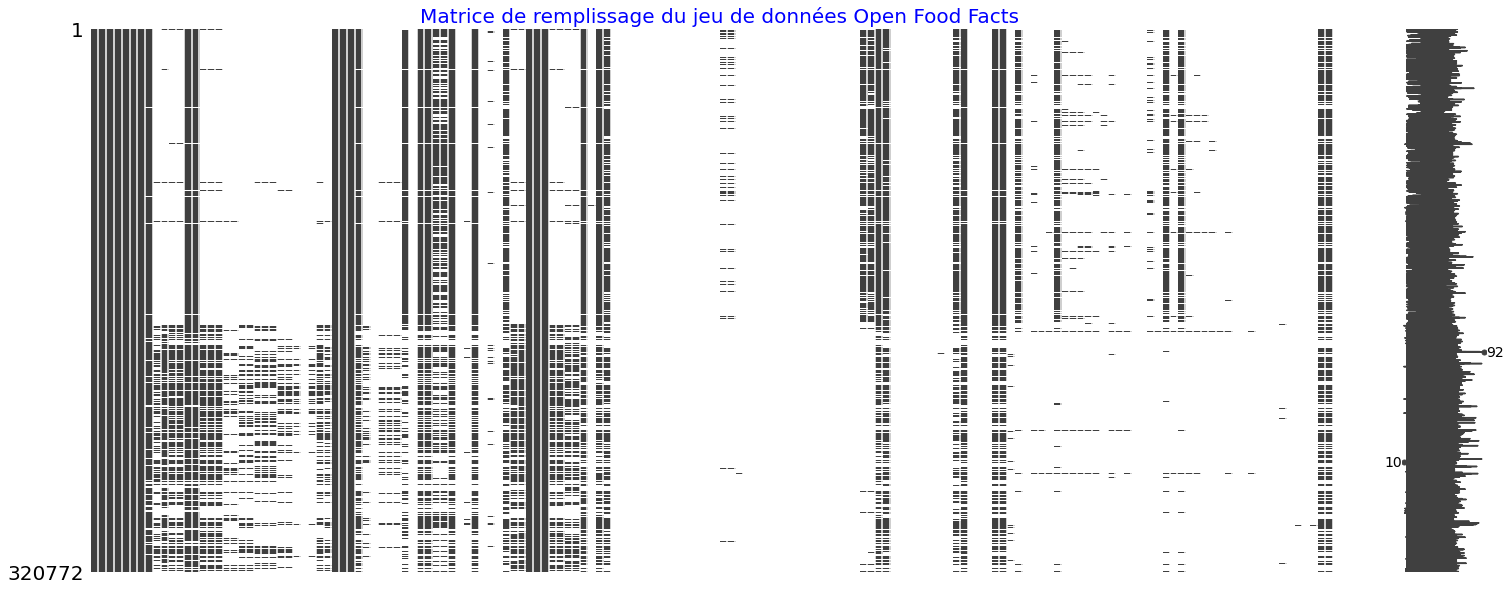

In [7]:
# Utilisation de la librairie missingo pour se faire une première idée du remplissage des données
msno.matrix(foodData)
plt.title(label='Matrice de remplissage du jeu de données Open Food Facts',fontsize=20, color='blue')
plt.show()

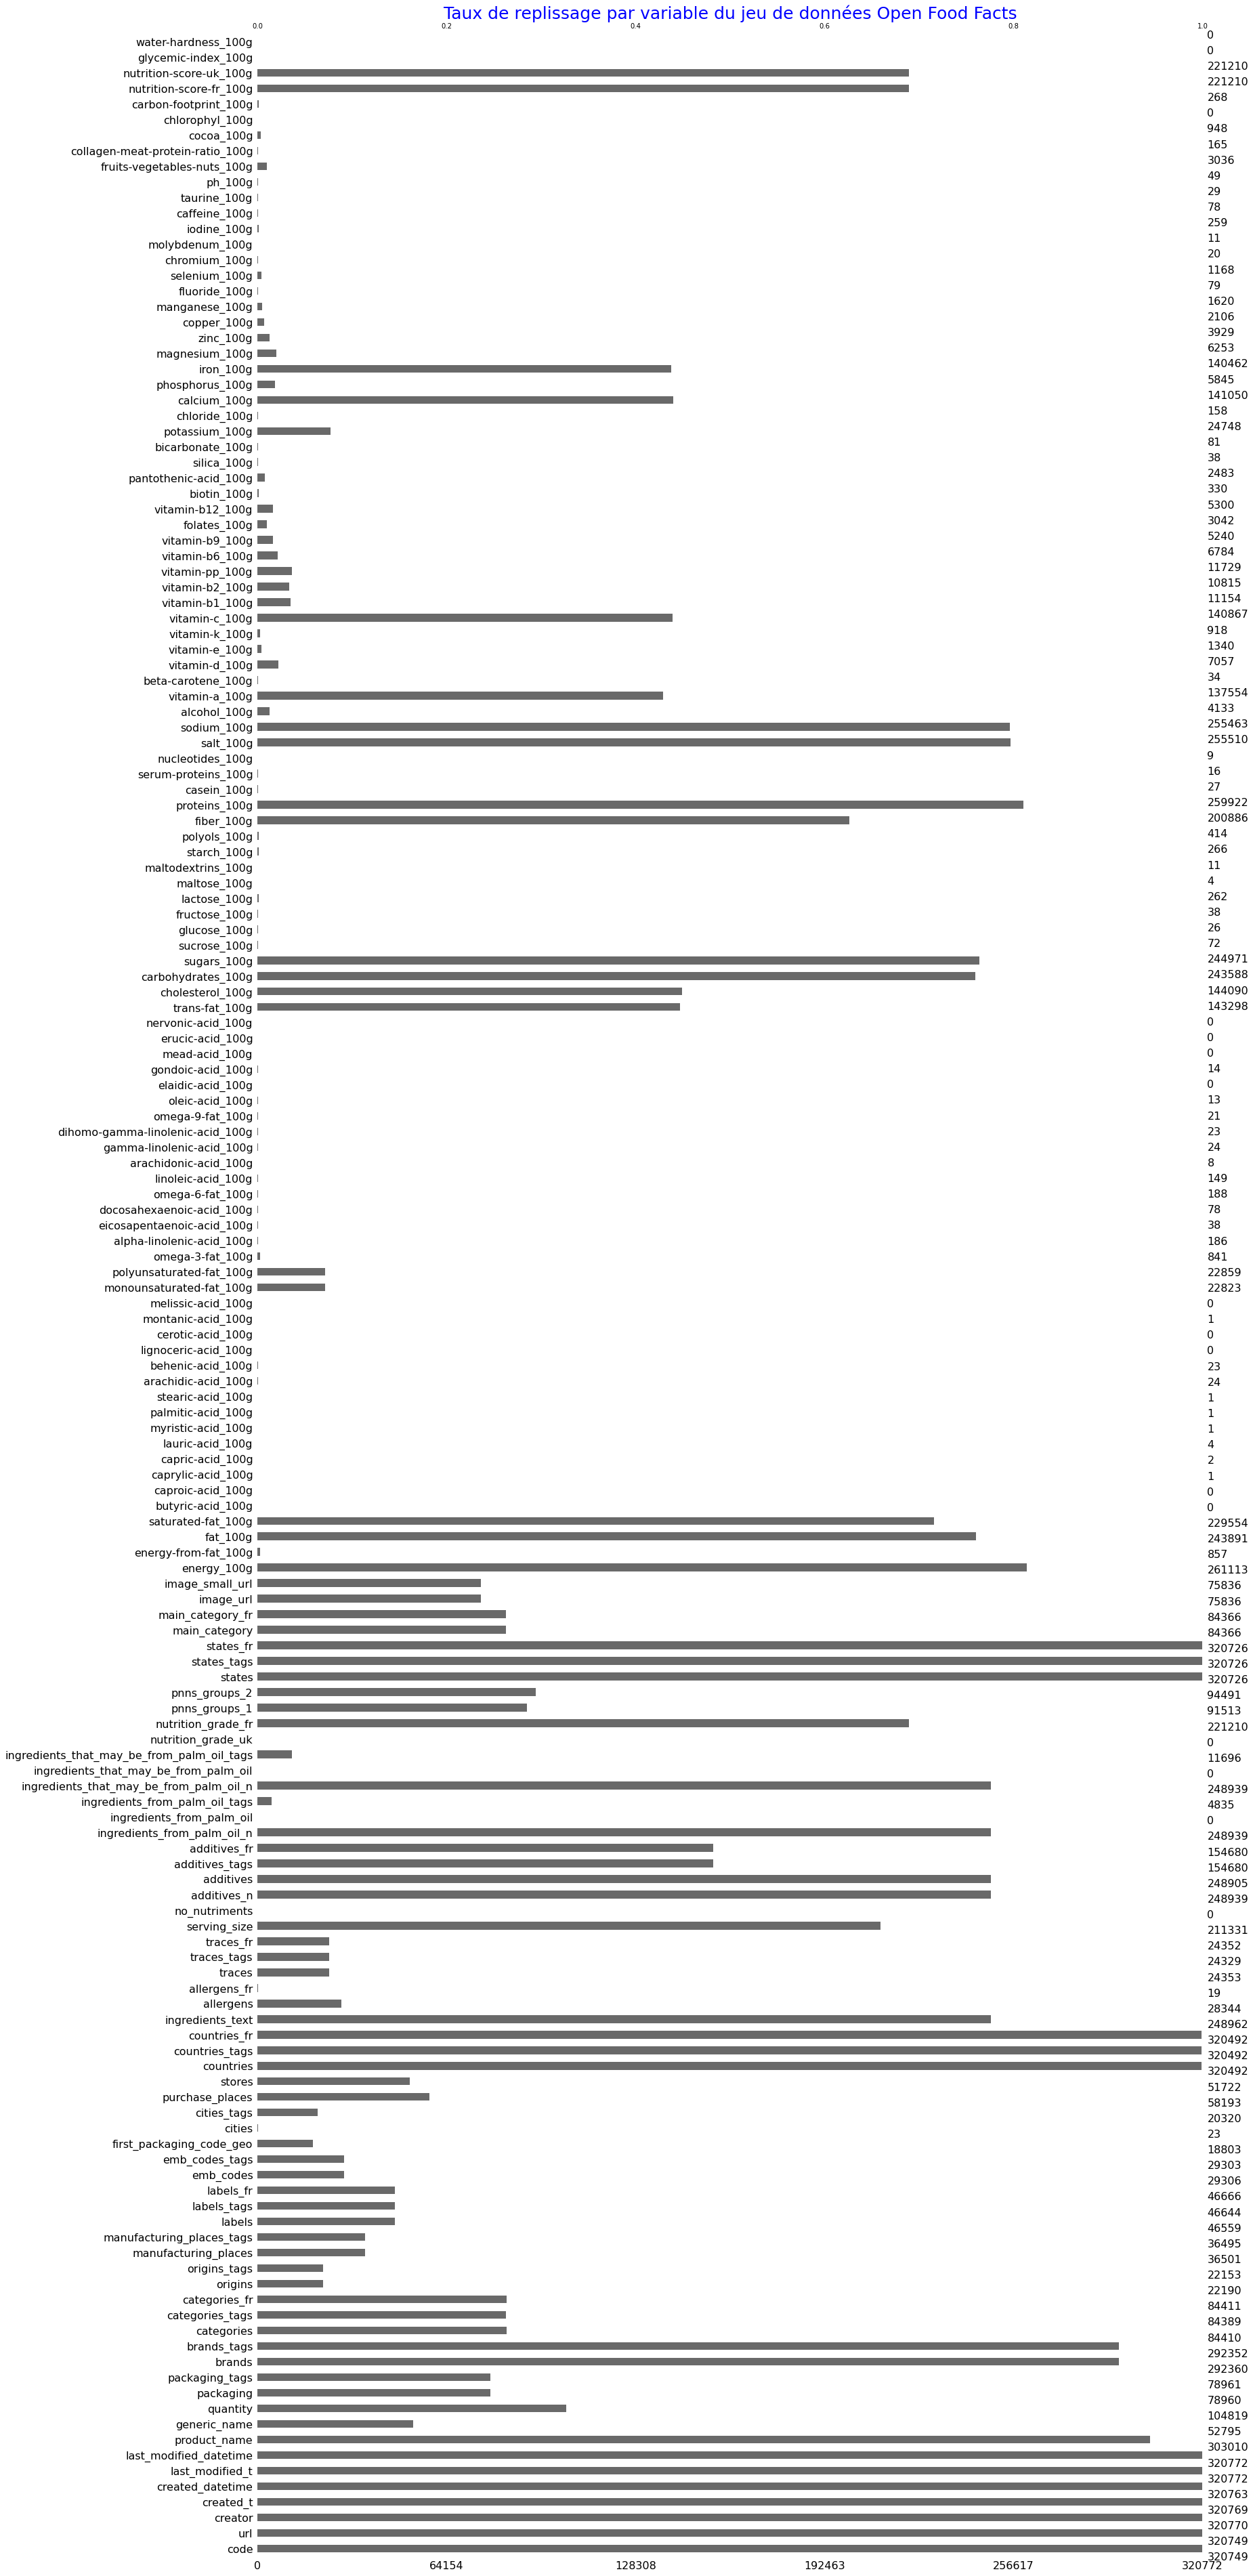

In [8]:
# Taux de remplissage des colonnes avec la librairie Missingno
msno.bar(foodData)
plt.title(label='Taux de replissage par variable du jeu de données Open Food Facts',fontsize=25, color='blue')
plt.show()

Les données sont plutôt éparses, de nombreuses variables sont peu renseingées.

In [9]:
#Affichage des valeurs uniques prises par la variables categories_fr
foodData['categories_fr'].unique().tolist()

[nan,
 'Filet-de-boeuf',
 "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Frais,Aliments à base de fruits et de légumes,Aliments à base de plantes frais,Légumes et dérivés,Légumes frais,Légumes-feuilles",
 'Snacks sucrés,Biscuits et gâteaux,Pâtisseries',
 "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Pains",
 'Boulange',
 "Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Légumineuses et dérivés,Légumineuses,Graines,Graines de légumineuses,Légumes secs,Lentilles,Lentilles vertes",
 'Root-bier',
 'Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés',
 'Plats préparés,Pizzas tartes salées et quiches,Quiches,Quiches lorraines',
 'Viandes,Volailles,Poulets,Poulets cuisinés',
 'Snacks sucrés,Confiseries,Bonbons',
 "Aliments et boissons à base de végétaux,Boissons,Aliments d'origine végétale,Boissons chaudes,Boissons à base de végétaux,Infusions,Thés,Thés noirs,Thés aromatisés,

In [10]:
foodData['categories_fr'].nunique()

21152

La variables categories_fr paraît difficilement exploitable pour catégoriser les produits, plus de 21.000 catégories, avec des libellés complexes.

In [11]:
#Affichage des valeurs uniques prises par la variables pnns_groups_1
foodData['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [12]:
#Affichage des valeurs uniques prises par la variables pnns_groups_2
foodData['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

La variable pnns_groups_1 ou pnns_groups_2 semble plus adaptées pour catégoriser un produit.

# 3. Filtrage du jeu de données

## 3.1 Produits sans code-barres
Le code-barre du produit correspond à la colonne 'code' définie par : 
barcode of the product (can be EAN-13 or internal codes for some food stores), for products without a barcode, Open Food Facts assigns a number starting with the 200 reserved prefix

In [13]:
# Avons-nous des produits sans code barre ?
foodData.loc[foodData['code'].isna()]


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous obtenons 23 produits sans code-barres dont les informations sont très peu renseignées.
Nous allons  éliminer les produits sans code-barres car de plus notre idée d'application se base sur le code-barres comme moyen d'identification du produit.

In [14]:
# Nous supprimons les lignes de produits sans code-barres
avec_code_barre_foodData=foodData.dropna(axis=0,subset='code')
# autre façon de l'écrire : avec_code_barre_foodData=foodData.loc[~foodData['code'].isna()]
avec_code_barre_foodData

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous avons supprimé les 23 lignes de produits sans-code barre, notre dataframe passe de 320.772 lignes à 320.749 lignes.

# 3.2 Doublons
Etude des doublons basée sur les code-barres des produits (colonne 'code') 

In [15]:
# Existe-t-il des lignes de produits exactement identiques ? --> Non
avec_code_barre_foodData.duplicated().sum()

0

In [16]:
# Existe-t-il des produits ayant le même code-barres ?
avec_code_barre_foodData.loc[((avec_code_barre_foodData['code'].duplicated(keep=False))),:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [17]:
data=avec_code_barre_foodData

Chauque produit a bien un code-barres unique.

**A ce stade, nous avons obtenu un nouveau dataframe dont chaque ligne produit a un code-barres unique.**


## 3.3 Filtrage sur les produits vendus en France
On se focalise sur les produits vendus en français car on répond à un appel à projet venant de Santé Publique France et car notre application doit proposer des alternatives de produits en cas de mauvais Nutri-score, donc il faut que le produit alternatif puisse être achété en France.
On s'interesse à la colonne 'countries_fr' définie comme "countries where the product is sold", en français.

In [18]:
# Avant tout filtrage / nettoyage : le nombre de produits ayant countries_fr égal à France est de 94.392  produits
data.loc[data['countries_fr']=='France']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,sigoise,1441186657,2015-09-02T09:37:37Z,1442570752,2015-09-18T10:05:52Z,lentilles vertes,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# On affiche la liste des pays uniques de la colonne 'countries_fr' (countries where the product is sold, en français)
data['countries_fr'].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

In [20]:
# Combien de valeurs uniques pour la colonne pays ? 
data['countries_fr'].nunique()

# On CONSTATE QUE : 
# On obtient un nombre de "pays" très supérieur au nombre de pays dans le monde.
# On remarque que dans cette colonne 'countries_fr' on peut avoir des LISTES de pays dans lequel le produit est vendu, par exemple 'Belgique,France,Pays-Bas,Royaume-Uni'
# On retrouver la France exprimée dans d'autres langues : 'Frankrijk'
# Certaines valeurs correspondent aux DOM TOM 
# On remarque aussi quelques valeurs abérrantes (ne sont pas des pays) : 'whole-milk-yogurts','en:stirred-yogurts','en:yogurts','en:fruit-yogurts','en:dairies',

717

In [21]:
# Quels sont les produits pour lesquels le pays de vente n'est pas renseigné ?
data.loc[data['countries_fr'].isna()]
#280 produits pour lesquels le pays de vente n'est pas renseigné

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
556,00030908,http://world-fr.openfoodfacts.org/produit/0003...,openfoodfacts-contributors,1429821931,2015-04-23T20:45:31Z,1430062290,2015-04-26T15:31:30Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10626,0013000001243,http://world-fr.openfoodfacts.org/produit/0013...,date-limite-app,1433904846,2015-06-10T02:54:06Z,1461432404,2016-04-23T17:26:44Z,Ketchup Heinze,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12973,0016000122505,http://world-fr.openfoodfacts.org/produit/0016...,openfoodfacts-contributors,1435883677,2015-07-03T00:34:37Z,1435919780,2015-07-03T10:36:20Z,Traditional Chex Mix,NaN,1 serving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14313,0018627740001,http://world-fr.openfoodfacts.org/produit/0018...,ppoppy,1335538076,2012-04-27T14:47:56Z,1439141745,2015-08-09T17:35:45Z,Go Lean Cereals,Céréales protéinées,400gr,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-4.0,NaN,NaN
25068,0030000015520,http://world-fr.openfoodfacts.org/produit/0030...,cquest,1433516224,2015-06-05T14:57:04Z,1439141756,2015-08-09T17:35:56Z,Instant Oatmeal Regular,NaN,224g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320240,9346321000055,http://world-fr.openfoodfacts.org/produit/9346...,foodorigins,1440655684,2015-08-27T06:08:04Z,1440655698,2015-08-27T06:08:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320276,935,http://world-fr.openfoodfacts.org/produit/935/...,openfoodfacts-contributors,1441724381,2015-09-08T14:59:41Z,1441724389,2015-09-08T14:59:49Z,poire montpelliéraine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320346,9400556004957,http://world-fr.openfoodfacts.org/produit/9400...,foodorigins,1440655914,2015-08-27T06:11:54Z,1440655956,2015-08-27T06:12:36Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320526,9550645107219,http://world-fr.openfoodfacts.org/produit/9550...,foodorigins,1441892000,2015-09-10T13:33:20Z,1441892004,2015-09-10T13:33:24Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# On constate qu'on peut aussi retrouver le pays de vente d'un produit à partir des colonnes 'purchase_places','cities_tags'
# Car on retrouve le mot France
data['purchase_places'].unique().tolist()

[nan,
 'Roissy,France',
 'Brossard Québec',
 'Brent,UK',
 'Brossard,Québec',
 'France',
 'Lyon,France',
 'Liverpool,United Kingdom',
 'Avion',
 'Madrid,España',
 'Courrières,France',
 'Germany',
 'Southampton,United Kingdom',
 'France,Nantes',
 'Nantes,France',
 'France,Paris',
 'Marseille',
 'United Kingdom,Liverpool',
 'Liverpool,UK',
 'Chicago,Illinois,USA',
 'london,united kingdom',
 'South Carolina',
 'london,uk',
 'Kilburn,London,England,united kingdom',
 'California',
 'UK',
 'Northville,Michigan,United States',
 'San Francisco,California,USA',
 'Mountain View, California, USA',
 'United States',
 'Canada',
 'Paris,France',
 'Kilburn,London,UK',
 'Virginia Beach,Virginia,United States',
 'Antibes,France',
 'London,United Kingdom',
 'France,Trignac',
 'Minneapolis,Minnesota,United States',
 'Oakland Park,Florida,USA',
 'Seattle,Washington,United States',
 'New York,USA',
 'Andover MA',
 'Saint-Jean-sur-Richelieu',
 'Mountain View,California,USA',
 'USA,Miami',
 'London UK',
 'Lon

In [23]:
data['cities_tags'].unique().tolist()

[nan,
 'brignemont-haute-garonne-france',
 'saint-didier-au-mont-d-or-rhone-france',
 'donzere-drome-france',
 'molay-littry-calvados-france',
 'saint-alban-les-eaux-loire-france',
 'vergeze-gard-france',
 'saint-priest-rhone-france',
 'chantonnay-vendee-france',
 'ducey-manche-france',
 'plelo-cotes-d-armor-france',
 'isigny-sur-mer-calvados-france',
 'obernai-bas-rhin-france',
 'avoudrey-doubs-france,avoudrey-doubs-france',
 'corbas-rhone-france,saint-romain-de-popey-rhone-france',
 'larceveau-arros-cibits-pyrenees-atlantiques-france',
 'brignais-rhone-france',
 'villaz-haute-savoie-france',
 'saint-julien-puy-laveze-puy-de-dome-france',
 'collinee-cotes-d-armor-france',
 'jonzac-charente-maritime-france',
 'quimperle-finistere-france',
 'roanne-loire-france',
 'brignais-rhone-france,boulazac-dordogne-france',
 'broons-cotes-d-armor-france',
 'coublevie-isere-france',
 'bourg-en-bresse-ain-france,brignais-rhone-france',
 'saint-bauzely-gard-france',
 'luche-pringe-sarthe-france',
 'k

In [24]:
# Filtrage sur les produits vendus en France.
# Pour chaque produit nous allons donc chercher si on retrouve le mot "france" dans l'une des 3 colonnes :
#'purchase_places' ou 'cities_tags' ou 'countries-fr'.

# Si l'un des de ces 3 champs comporte le mot "france" (avec ou sans majuscule), 
# On affecte la valeur "France" dans la colonne 'countries_fr'
mask1=(data['purchase_places'].str.contains('France',case=False,na=False) 
       | data['cities_tags'].str.contains('France',case=False,na=False) 
       | data['countries_fr'].str.contains('France',case=False,na=False))

data.loc[mask1,'countries_fr']='France'


# Filtrage du dataframe sur les produits vendus en France :
data.loc[data['countries_fr']=='France']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette opération a permis de récupérer plus de 4.400 lignes de produits vendus en France : le filtrage du dataframe sur la France donne maintenant 98.832 lignes de produits ( VS 94.392 lignes de produits avant ).

**Nous allons également intégrer les produits vendus dans les DOMTOM français.**

In [25]:
# Définition et affichage de la liste des DOM TOM français
listeDOMTOM=["Guadeloupe","Nouvelle-Calédonie","Guyanne","Polynésie française","Martinique","La Réunion","Mayotte","Saint-Martin","Wallis-et-Futuna","Saint-Barthélemy","Saint-Pierre-et-Miquelon"]
listeDOMTOM

['Guadeloupe',
 'Nouvelle-Calédonie',
 'Guyanne',
 'Polynésie française',
 'Martinique',
 'La Réunion',
 'Mayotte',
 'Saint-Martin',
 'Wallis-et-Futuna',
 'Saint-Barthélemy',
 'Saint-Pierre-et-Miquelon']

In [26]:
# Quels sont les produits vendus dans les DOM TOM français ?
data.loc[data['countries_fr'].isin(listeDOMTOM)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
460,0001210078780,http://world-fr.openfoodfacts.org/produit/0001...,lbhlbh,1490476761,2017-03-25T21:19:21Z,1490476765,2017-03-25T21:19:25Z,Mini Prince Sablés Goût chocolat,NaN,160 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10530,0012656707370,http://world-fr.openfoodfacts.org/produit/0012...,date-limite-app,1470539282,2016-08-07T03:08:02Z,1470540884,2016-08-07T03:34:44Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12986,0016000264601,http://world-fr.openfoodfacts.org/produit/0016...,openfoodfacts-contributors,1460569742,2016-04-13T17:49:02Z,1460569743,2016-04-13T17:49:03Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22694,0026595786891,http://world-fr.openfoodfacts.org/produit/0026...,openfoodfacts-contributors,1460561457,2016-04-13T15:30:57Z,1460561520,2016-04-13T15:32:00Z,Tropik splash,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23716,0028400047456,http://world-fr.openfoodfacts.org/produit/0028...,openfoodfacts-contributors,1477102949,2016-10-22T02:22:29Z,1477102949,2016-10-22T02:22:29Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320498,9501007301509,http://world-fr.openfoodfacts.org/produit/9501...,openfoodfacts-contributors,1487412695,2017-02-18T10:11:35Z,1487412756,2017-02-18T10:12:36Z,Penche KUBA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320564,9556001212566,http://world-fr.openfoodfacts.org/produit/9556...,date-limite-app,1471208959,2016-08-14T21:09:19Z,1471208961,2016-08-14T21:09:21Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320572,9556023896744,http://world-fr.openfoodfacts.org/produit/9556...,openfoodfacts-contributors,1484321035,2017-01-13T15:23:55Z,1484321119,2017-01-13T15:25:19Z,Jacket barbecue crisps,NaN,160g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320621,9556121020164,http://world-fr.openfoodfacts.org/produit/9556...,openfoodfacts-contributors,1474056291,2016-09-16T20:04:51Z,1474056341,2016-09-16T20:05:41Z,Pacific crackers,NaN,200g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Dans la même logique que précédement, pour chaque produit, on identifie si l'un des 3 champs 
#'purchase_places' ou 'cities_tags' ou 'countries-fr'contient le nom d'un DOM TOM de la France.
# Si oui, on affecte la valeur "France" dans le champ "countries_fr".
for dom_tom in listeDOMTOM:
    mask2=(data['purchase_places'].str.contains(dom_tom,case=False,na=False) 
           | data['cities_tags'].str.contains(dom_tom,case=False,na=False) 
           | data['countries_fr'].str.contains(dom_tom,case=False,na=False))
    data.loc[mask2,'countries_fr']='France'


In [28]:
data.loc[data['countries_fr'].isin(listeDOMTOM)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [29]:
# Filtrage des lignes de produits ayant "France" pour pays de vente
french_data=data.loc[data['countries_fr']=='France']
french_data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On obtient un df de 99.316 lignes. En intégrant les produits vendus dans les DOMTOM on a pu récupérer 484 produits de plus.

## 3.4 Filtrage des colonnes (features)
Selection des colonnes en 2 étapes :

1/ Identification des colonnes ayant un taux de remplissage de données supérieur à un certain le taux ;

2/ Parmi les colonnes restantes, selection des features permettant de répondre à notre idée d'application.

Text(0.5, 1.0, 'Matrice de remplissage du jeu de données après filtrage des lignes')

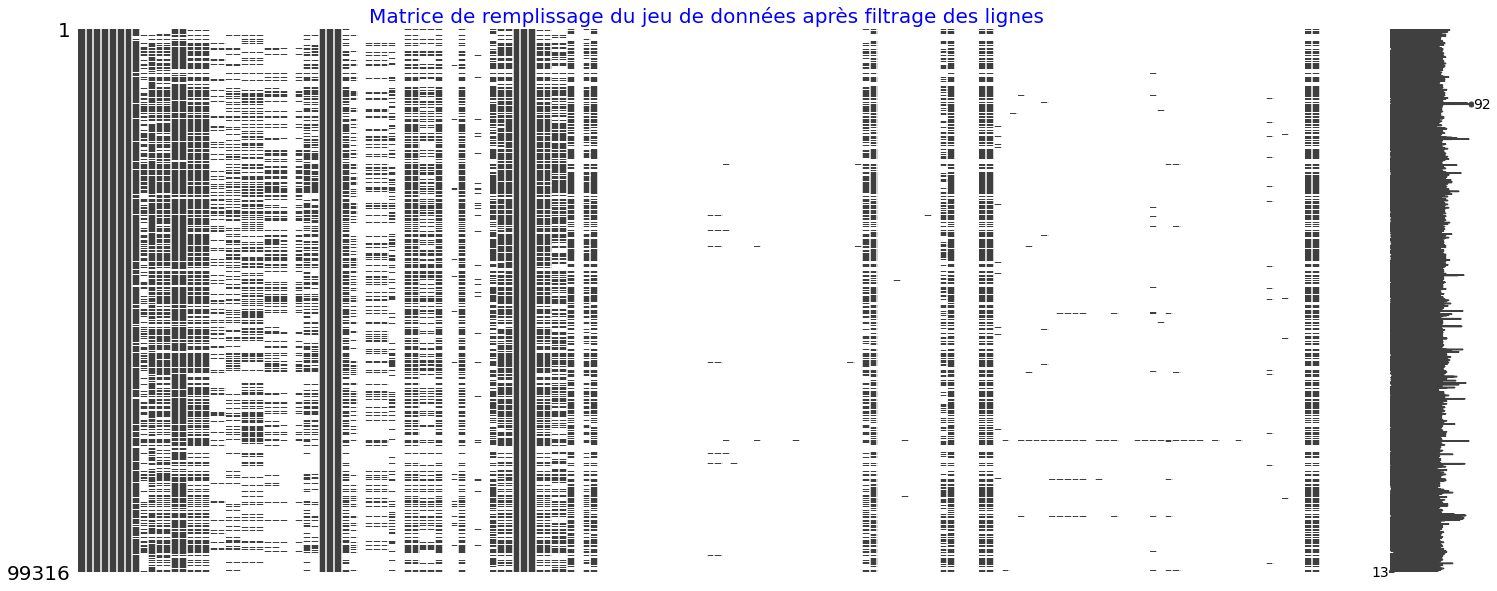

In [30]:
msno.matrix(french_data)
plt.title(label='Matrice de remplissage du jeu de données après filtrage des lignes',fontsize=20, color='blue')

### 3.4.1 Identification des colonnes dont le taux de remplissage est < 50% ;

In [31]:
##### Cette première méthode utilisant des boucles pour le filtrage des colonnes selon leur taux de remplissage
##### --> on privilégiera la 2ème méthode (au bloc suivant), sans boucle, plus optimisé.

# on élimine les colonnes très peu remplies, pour ne conserver que les colonnes avec un taux de remplissage supérieur à un taux souhaité :

# Liste des variables (colonnes) vides à 100 %
colonnes_vides = [col for col in french_data.columns if french_data[col].isnull().all()]
colonnes_vides

# taux (entre 0 et 1)de remplissage minimum souhaité pour les colonnes ( si 0, on retrouve le résultat précédent)
taux_de_remplissage=0.05

#Liste des colonnes ayant ce taux de remplissage minimum, à conserver
colonnes_non_vides = [col for col in french_data.columns if foodData[col].count()>(taux_de_remplissage)*french_data.shape[0]]
colonnes_non_vides
#Restriction du dataframe à ces colonnes
foodData_sans_col_vides=french_data.filter(items=colonnes_non_vides)
foodData_sans_col_vides

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,0.1,NaN,0.0009,NaN,22.0,22.0
136,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# 2eme méthode : 

# On ne veut conserver que les colonnes avec un taux de remplissage supérieur à un taux souhaité
# taux (entre 0 et 1) de remplissage minimum souhaité pour les colonnes
taux_de_remplissage=0.5
# liste des colonnes qui sont remplies à au moins 'taux_de_remplissage'
french_data.loc[:,(1-french_data.isna().mean())>=(taux_de_remplissage)].columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

### 3.4.2 Sélection des colonnes pertinentes

In [33]:
#En utilisant un taux de remplissage de colonnes au moins égal à 50 %, on obtient 42 colonnes au lieu des 162 de départ.
# Parmi ces colonnes, on choisit les indicateurs (colonnes) permettant de répondre à notre idée d'application.

indicateursRetenus=['code',
                    'product_name',
                   
                    'pnns_groups_1',
                    'pnns_groups_2',
                    
                    'energy_100g',
                    'fat_100g',
                    'saturated-fat_100g',
                    'sugars_100g',
                    'carbohydrates_100g',
                    'salt_100g',
                    'sodium_100g',

                    'fiber_100g',
                    'proteins_100g',
                  
                    'nutrition-score-fr_100g',
                    'nutrition_grade_fr']

short_data=french_data.filter(items=indicateursRetenus)
short_data

,code,product_name,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,unknown,unknown,1883.0,20.0,12.5,57.5,70.0,0.09652,0.038,2.5,2.5,22.0,e
136,0000000039259,Twix x2,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,Roussette du Bugey (2011),NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,Beverages,Non-sugared beverages,21.0,0.2,0.2,0.5,0.5,0.02540,0.010,0.2,0.5,2.0,c
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,Fish Meat Eggs,Processed meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**En CONCLUSION du filtrage le dataframe obtenu :**
- comporte 99.316 lignes
- ne comporte que des produits avec code-barres unique
- comporte uniquement des produits vendus en France (métropolitaine et DOMTOM)
- ne comporte que les 15 features necessaires pour notre idée d'application

# 4. Gestion des Valeurs aberrantes
**2 parties :**

**1/ Opérations de contrôle de cohérence pour detecter les valeurs abérrantes :**

--> Pour 100g de produit, la quantité de graisse saturées, de sucre, de sel de sodium, de fibre de protéines de fruits, légumes et noix... ne peuvent pas êtres négatives ni supérieures à 100

--> Le nutriscore prend des valeurs comprises entre -15 et 40

--> Le produit avec plus la forte valeur énergétique est l'huile, elle est de 900kcal pour 100g. Une valeur supérieure est impossible.

--> La valeur de satured_fat ne doit pas être supérieure à fat

--> La valeur de sugar ne doit pas supérieure aux carbohydrates

--> la somme des valeurs nutritionnelles ne peut pas dépasser 100g


**2/ Méthode des écarts interquartiles**

In [34]:
# Nombre total de valeurs manquantes
short_data.isna().sum().sum()

519365

In [35]:
# Taux de valeurs manquantes 
round(short_data.isna().mean().mean(),4)

0.3486

In [36]:
# Affichage des informations de notre df : par variable, compte des non nulls et type 
short_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99316 entries, 0 to 320770
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     99316 non-null  object 
 1   product_name             91978 non-null  object 
 2   pnns_groups_1            65408 non-null  object 
 3   pnns_groups_2            67583 non-null  object 
 4   energy_100g              64976 non-null  float64
 5   fat_100g                 48027 non-null  float64
 6   saturated-fat_100g       62715 non-null  float64
 7   sugars_100g              62860 non-null  float64
 8   carbohydrates_100g       47588 non-null  float64
 9   salt_100g                62920 non-null  float64
 10  sodium_100g              62916 non-null  float64
 11  fiber_100g               45918 non-null  float64
 12  proteins_100g            64692 non-null  float64
 13  nutrition-score-fr_100g  61739 non-null  float64
 14  nutrition_grade_fr   

## 4.1 Opérations de contrôle de cohérence des données

In [37]:
# Description satistique des variables numériques de notre df
short_data.describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
count,6.497600e+04,48027.000000,62715.000000,62860.000000,47588.000000,62920.000000,62916.000000,45918.000000,64692.000000,61739.000000
mean,1.170169e+03,13.334230,5.434936,13.419435,27.685493,1.160866,0.457061,2.556036,7.755988,8.684624
std,1.279815e+04,16.922432,8.537700,19.066501,27.389879,4.317379,1.699750,4.628999,7.885766,9.041860
min,0.000000e+00,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,4.270000e+02,1.300000,0.300000,1.000000,4.000000,0.080000,0.031496,0.000000,1.800000,1.000000
50%,1.034000e+03,6.800000,2.000000,4.100000,14.500000,0.558800,0.220000,1.320000,6.000000,9.000000
75%,1.648000e+03,21.000000,7.500000,17.700000,53.000000,1.244600,0.490000,3.200000,11.000000,15.000000
max,3.251373e+06,380.000000,210.000000,105.000000,190.000000,211.000000,83.000000,178.000000,100.000000,40.000000


On constate :
- Des valeurs négatives pour le sucre
- Des valeurs supérieures à 100 pour les graisses, les graisse saturée, sucre, les carbohydrates,le sel, les fibres.

**La quantité de nutriment pour 100 g de produit doit être comprise en 0 et 100 g**

In [38]:
# Recherche des produits ayant des valeurs nutritionnelles pour 100g stricement négatives et replacement par NaN
# Traitement effectué pour tous les indicateurs, même ceux qui avec ne sont pas concernés avec les données actuelles. 
# On prévoit le cas où de nouvelles lignes produits seraient ajoutées à la base de données avec des valeurs aberrantes de ce type.
short_data.loc[short_data['fat_100g']<0 ,'fat_100g']=np.nan
short_data.loc[short_data['saturated-fat_100g']<0 ,'saturated-fat_100g']=np.nan
short_data.loc[short_data['sugars_100g']<0 ,'sugars_100g']=np.nan
short_data.loc[short_data['carbohydrates_100g']<0 ,'carbohydrates_100g']=np.nan
short_data.loc[short_data['salt_100g']<0 ,'salt_100g']=np.nan
short_data.loc[short_data['sodium_100g']<0 ,'sodium_100g']=np.nan
short_data.loc[short_data['fiber_100g']<0 ,'fiber_100g']=np.nan
short_data.loc[short_data['proteins_100g']<0 ,'proteins_100g']=np.nan

In [39]:
# De même pour les produits sont les valeurs nutritionnelles pour 100g sont stricement supérieurs à 100, elle sont remplacées par NaN
# Traitement effectué pour tous les indicateurs, même ceux qui avec ne sont pas concernés avec les données actuelles. 
# On prévoit le cas où de nouvelles lignes produits seraient ajoutées avec des valeurs aberrantes de ce type.
short_data.loc[short_data['fat_100g']>100 ,'fat_100g']=np.nan
short_data.loc[short_data['saturated-fat_100g']>100 ,'saturated-fat_100g']=np.nan
short_data.loc[short_data['carbohydrates_100g']>100 ,'carbohydrates_100g']=np.nan
short_data.loc[short_data['sugars_100g']>100 ,'sugars_100g']=np.nan
short_data.loc[short_data['salt_100g']>100 ,'salt_100g']=np.nan
short_data.loc[short_data['sodium_100g']>100 ,'sodium_100g']=np.nan
short_data.loc[short_data['fiber_100g']>100 ,'fiber_100g']=np.nan
short_data.loc[short_data['proteins_100g']>100 ,'proteins_100g']=np.nan


**Nutriscore varie entre -15 et +40**

In [40]:
# Le nutriscore prend une valeur comprise entre -15 et + 40. 
# Si un produit comporte un nurtiscore en dehors de cet intervelle, on remplace sa valeur par NaN
short_data.loc[short_data['nutrition-score-fr_100g']<-15 ,'nutrition-score-fr_100g']=np.nan
short_data.loc[short_data['nutrition-score-fr_100g']>40 ,'nutrition-score-fr_100g']=np.nan

**La valeur énergétique ne peut pas dépasser les 900kcal**

In [41]:
# Selon la page de définition des variables, la colonne energy_100g est exprimée en kJ.
# Pour passer de l'energie en kJ à la l'énergie en kcal, on divise par 4,1868.
short_data['energy_kcal_100g']=round(short_data['energy_100g']/4.1868,2)

# On identifie les produits qui ont une valeur énergétique supérieur à la valeur max possible ( 900kcal, correspond à l'huilte)
short_data.loc[short_data['energy_kcal_100g']>900 ,['product_name','energy_kcal_100g']]


,product_name,energy_kcal_100g
56561,Tawny' Orange,1207.13
161426,Huile d'avocat,927.44
178567,Confiserie Firenze Apfel Streuselkuchen Tiefge...,1002.44
178787,Halva with Almonds,2384.40
179179,Lot De 4 Baguettes,999.33
...,...,...
305223,Miel D'eucalyptus,1373.13
310564,Huile d'olive extra vierge biologique,900.45
313852,Cornetto Mini X8 Fruit,1348.05
319695,Miel,1415.16


In [42]:
# On remplace par NaN la valeur energétique des produits dont la valeur energétique est strictement supérieure à 900 kcal
short_data.loc[short_data['energy_kcal_100g']>900 ,'energy_kcal_100g']=np.nan

In [43]:
# On suprime la colonne energy exprimé en kJ pour garder celle exprimée en kcal
short_data.drop(['energy_100g'],axis=1,inplace=True)

**Contrôle de cohérence des valeurs entre graisse et graisse saturée, et sucre et carbohydrates**

In [44]:
# Est-ce que saturated_fat_100g est toujours inférieure à fat_100g ?
short_data.loc[short_data['fat_100g']<short_data['saturated-fat_100g'],['product_name','fat_100g','saturated-fat_100g']]
# Non, on trouve 74 produits pour lesquels la quantité de graisse saturée est supérieure à la quantité de graisse totale

,product_name,fat_100g,saturated-fat_100g
6570,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G,0.00,1.0
35809,Sablés pur beurre,26.90,27.0
54995,Malt O Meal Cereal Coco Roos 23.,5.00,15.0
57332,Mae Ploy Chilli Sauce Sweet For Chicken - 25fl...,0.00,0.9
59062,Vinaigre Pour Sushi,0.00,0.1
...,...,...,...
303082,Tic Tac Menthe,0.00,0.5
305772,Buongrano,0.00,1.6
315953,"Lipton Alps 20X1.1 GR, 1 Boîte",0.00,0.1
316996,Crème De Coco Uht AROY-D 1L,18.89,19.0


In [45]:
#On remplace par NaN la valeur en graisses saturées des produits pour lesquels la quantité de graisses saturées est supérieur à graisse
short_data.loc[short_data['fat_100g']<short_data['saturated-fat_100g'],'saturated-fat_100g']=np.nan

In [46]:
#idem pour sucre et carbohydrates
# Est-ce que carbohydrates_100g est bien toujours supérieur à sugars_100g ?
short_data.loc[short_data['sugars_100g']>short_data['carbohydrates_100g'],['product_name','carbohydrates_100g','sugars_100g']]
# Non, on trouve 80 produits pour lesquels le sucre est supérieur aux carbohydrates

,product_name,carbohydrates_100g,sugars_100g
27505,6 Pork & Bramley Apple Sausages,5.50,5.6
101969,"St.dalfour, Deluxe Spread Black Cherry 225ml",50.00,52.0
106847,Jarritos - Mangue,11.67,11.7
149836,Alo exposed,6.25,15.0
174058,Vita coco,4.55,5.0
...,...,...,...
305772,Buongrano,0.00,20.5
310167,Chiffonade,0.10,0.3
312063,Filets d'anchois à l'huile d'olive,1.60,2.0
315480,Ben & Jerry's - Fairly Nuts,23.00,26.0


In [47]:
#On remplace par NaN la valeur en sucre des produits pour lesquels les sucres sont supérieurs aux carbohydrates
short_data.loc[short_data['sugars_100g']>short_data['carbohydrates_100g'],'sugars_100g']=np.nan

In [48]:
#Vérification sur la description statistique de certains traitements 
short_data.describe()

,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,energy_kcal_100g
count,48025.000000,62624.00000,62756.000000,47580.000000,62918.000000,62916.000000,45917.000000,64692.000000,61739.000000,64879.000000
mean,13.324686,5.42800,13.409665,27.668872,1.155563,0.457061,2.552216,7.755988,8.684624,265.170778
std,16.834668,8.48295,19.047089,27.359030,4.206747,1.699750,4.556064,7.885766,9.041860,184.560217
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,1.300000,0.30000,1.000000,4.000000,0.080000,0.031496,0.000000,1.800000,1.000000,101.510000
50%,6.800000,2.00000,4.100000,14.400000,0.558800,0.220000,1.320000,6.000000,9.000000,246.730000
75%,21.000000,7.50000,17.700000,53.000000,1.244600,0.490000,3.200000,11.000000,15.000000,392.900000
max,100.000000,100.00000,100.000000,100.000000,100.000000,83.000000,100.000000,100.000000,40.000000,899.970000


On peut vérifier :
    - les quantités de nutriments pour 100g sont bien entre 0 et 100g
    - la valeur energétique en kcal pour 100g reste inférieur à 900kcal
    - Le Nutri-score reste compris entre -15 et 40

**La somme des valeurs nutritionnelles doit rester < 100g**

In [49]:
# On calcul la somme des nutriments d'un produit dans le but de vérifier qu'elle reste toujours inférieur à 100
df_somme_nutriments=short_data['fat_100g']
+short_data['carbohydrates_100g']
+short_data['salt_100g']
+short_data['fiber_100g']
+short_data['proteins_100g']

df_somme_nutriments.describe()

count    48025.000000
mean        13.324686
std         16.834668
min          0.000000
25%          1.300000
50%          6.800000
75%         21.000000
max        100.000000
Name: fat_100g, dtype: float64

La somme des quantité de nutriments pour 100g de produit reste bien inférieure à 100g

In [50]:
#Vérification des valeurs prises par le Nutriscore (en lettres)

In [51]:
short_data['nutrition_grade_fr'].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

In [52]:
short_data.loc[:,['code','nutrition_grade_fr']].groupby(['nutrition_grade_fr']).count()

,code
nutrition_grade_fr,
a,10257
b,9266
c,13234
d,17106
e,11876


In [53]:
# Pour meilleur lisibilité, passage en lettre majuscule
short_data['nutrition_grade_fr'].replace(['a','b','c','d','e'],['A','B','C','D','E'],inplace=True)
short_data['nutrition_grade_fr'].unique()

array([nan, 'E', 'D', 'C', 'A', 'B'], dtype=object)

In [54]:
# Nombre total de valeurs manquantes après opérations
short_data.isna().sum().sum()

519670

In [55]:
#Taux de valeurs manquantes sur tout le df
round(short_data.isna().mean().mean(),4)

0.3488

Ces opérations ont introduit 0.02% de valeurs manquantes supplémentaires.

## 4.2 Methode des écarts interquartiles
Mise en oeuvre de la méthode des écarts interquartiles pour l'identification des valeurs aberrantes.

Pour que le traitement soit pertinent, nous allons travailler sur des catégories homogènes de produits, cad même pnns_groups_2.

In [56]:
# Dataframe IQR_data pour travailler sur la mise en oeuvre de la méthode interquartile
IQR_data=short_data
IQR_data

,code,product_name,pnns_groups_1,pnns_groups_2,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nutrition_grade_fr,energy_kcal_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0000000024600,Filet de bœuf,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,0000000027205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,0000000036252,Lion Peanut x2,unknown,unknown,20.0,12.5,57.5,70.0,0.09652,0.038,2.5,2.5,22.0,E,449.75
136,0000000039259,Twix x2,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,Roussette du Bugey (2011),NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,Thé vert Earl grey,Beverages,Non-sugared beverages,0.2,0.2,0.5,0.5,0.02540,0.010,0.2,0.5,2.0,C,5.02
320764,9918,"Cheese cake thé vert, yuzu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,Rillette d'oie,Fish Meat Eggs,Processed meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Taux de valeur manquantes avant la méthode des écarts interquartiles
round(IQR_data.isna().mean().mean(),4)

0.3488

### 4.2.1 Nettoyage de la catégorie de produits

In [58]:
# Nombre de produits par catégories pnns_groups_2
IQR_data.loc[:,['code','pnns_groups_2']].groupby(['pnns_groups_2']).count()

,code
pnns_groups_2,
Alcoholic beverages,2110
Appetizers,1632
Artificially sweetened beverages,211
Biscuits and cakes,3776
Bread,1323
Breakfast cereals,1114
Cereals,3067
Cheese,3117
Chocolate products,2240


In [59]:
#Remplacement par NaN des valeurs 'unknown' de pnns_groups_2
IQR_data.loc[IQR_data['pnns_groups_2']=='unknown','pnns_groups_2']=np.nan

On fusionne les catégories de pnns_groups_2 qui sont des catégories très proches et notament les catégories avec très peu de produits :
- fruits et Fruits
- legumes,vegetable, et Legumes
- les boissons sucrées
- Fruit juices et Fruit nectar et Fruits juices
-'Salty and fatty products' avec Appetizer
-Tripe dishes et processed meat (essentiellement de la charcuterie)

In [60]:
#Remplacement des libéllés des catégories
IQR_data['pnns_groups_2'].replace(['fruits','legumes','vegetables','cereals','Artificially sweetened beverages','Fruit nectars','Fruits juices','Salty and fatty products','Tripe dishes'],['Fruits','Legumes','Legumes','Cereals','Sweetened beverages','Fruit juices','Fruit juices','Appetizers','Processed meat'],inplace=True)

In [61]:
# Nombre de produits par catégories pnns_groups_2
IQR_data.loc[:,['code','pnns_groups_2']].groupby(['pnns_groups_2']).count()

,code
pnns_groups_2,
Alcoholic beverages,2110
Appetizers,1647
Biscuits and cakes,3776
Bread,1323
Breakfast cereals,1114
Cereals,3068
Cheese,3117
Chocolate products,2240
Dairy desserts,750


In [62]:
# Lorsque 'pnns_groups_2 est NaN, est-ce que 'pnns_groups_1'l'est aussi ?
IQR_data.loc[(IQR_data['pnns_groups_2'].isna())&(~IQR_data['pnns_groups_1'].isna()),['pnns_groups_1','pnns_groups_1','code']]

,pnns_groups_1,pnns_groups_1,code
46,unknown,unknown,0000000024600
106,unknown,unknown,0000000036252
136,unknown,unknown,0000000039259
138,unknown,unknown,0000000039529
183,unknown,unknown,0000007020254
...,...,...,...
320688,unknown,unknown,96085745
320695,unknown,unknown,96095027
320696,unknown,unknown,96095065
320736,unknown,unknown,9780201379129


La réponse est OUI, Lorsque 'pnns_groups_2 est NaN, 'pnns_groups_1'l'est.
Donc pnns_groups_1 ne va pas nous aider à retrouver les pnns_groups_2 manquants.
On va supprimer cette colonne.

In [63]:
# Supression de la colonne pnn pnns_groups_1
IQR_data.drop(['pnns_groups_1'],axis=1,inplace=True)

In [64]:
#Suppression des lignes de produits n'ayant pas de catégorie pnns_groups_2 renseignée : difficile de les imputer, necessaire pour idée d'application, et pour les traitements des valeurs aberrantes et des valeurs manquantes
IQR_data.dropna(axis=0,subset='pnns_groups_2',inplace=True)

In [65]:
IQR_data.shape

(54967, 14)

In [66]:
# Taux de valeur manquantes apres la suppression des produits n'ayant pas de categories
round(IQR_data.isna().mean().mean(),4)

0.2164

In [67]:
# Nombre total de valeurs manquantes apres la suppression des produits n'ayant pas de categories
short_data.isna().sum().sum()

166542

### 4.2.2 Mise en oeuvre de la méthode des interquartiles
Identification des valeurs aberrantes avec la méthode des écarts interquartiles.

Nous devons travailler sur des catégories homogènes de produits pour que le traitement soit pertinent.

**Mise en oeuvre sur un exemple :** Variable : energy_kcal_100g et categorie : Biscuits and cakes

In [68]:
# Démarche de la méthode pour la variable energy_kcal_100g et la catégorie 'Biscuits and cakes' de 'pnns_groups_2'
df_temp=IQR_data.loc[(IQR_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g'] 
round(df_temp.describe(),2)

count    3344.00
mean      450.14
std        70.21
min        15.05
25%       425.15
50%       463.60
75%       497.99
max       619.09
Name: energy_kcal_100g, dtype: float64

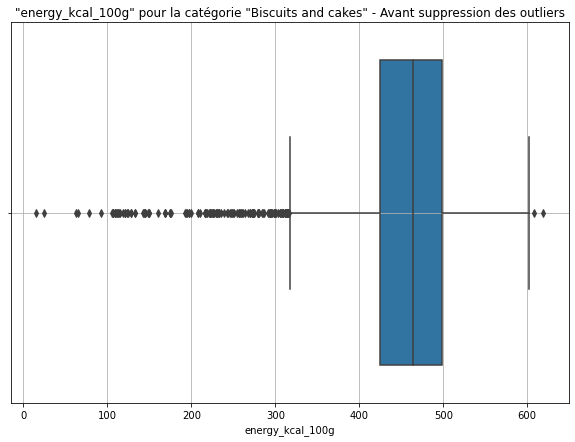

In [69]:
# Affichage boîte à moutaches pour la Valeur Energétique de 100g de produit
plt.figure(figsize=(10,7))
sns.boxplot(x=df_temp )
plt.title('"energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Avant suppression des outliers')
plt.grid()

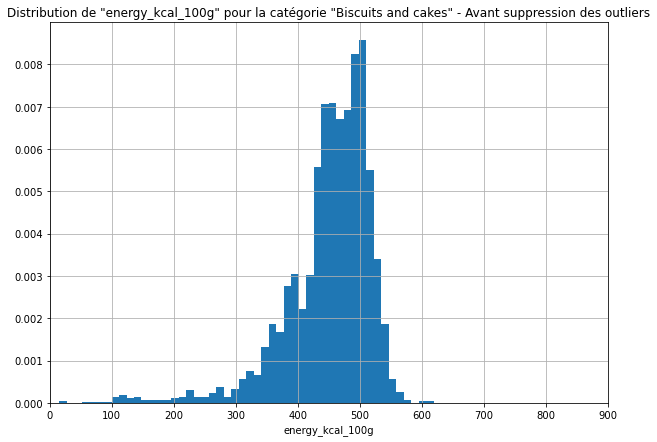

In [70]:
#Représentation de la distribition
plt.figure(figsize=(10,7))
plt.hist(df_temp,50,density=True)
plt.title('Distribution de "energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Avant suppression des outliers')
plt.xlim(0,900)
plt.xlabel('energy_kcal_100g')
plt.grid(True)
plt.show()

In [71]:
#### MISE EN OEUVRE DE LA METHODE DES ECARTS INTERQUARTILES 
#### POUR LA VARIABLE energy_kcal_100g sur la categorie pnns_groups_2 "Biscuits and cakes"

# On identifie les valeurs aberrantes à l'aide de la méthode de l'écart interquartile (IQR)
IQR_exempl_data=IQR_data.copy()

# On calcule Q1 et Q3
q1=df_temp.quantile(q=0.25)
q3=df_temp.quantile(q=0.75)

# On calcule l'écart interquartile (IQR) comme la différence Q3-Q1

IQR=q3-q1

# On calcule la borne inférieure  et supérieure à l'aide du Q1, Q3 et de l'écart interquartile
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR

resultat_IQR =  [ q1, q3, IQR, borne_inf, borne_sup]
# print(resultat_IQR)

# On considère les valeurs à l'extérieur de la borne inférieure et supérieure comme des valeurs aberrantes
# Ces valeurs sont remplacées par NaN
IQR_exempl_data.loc[(IQR_exempl_data['energy_kcal_100g']>borne_sup)&(IQR_exempl_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g']=np.nan
IQR_exempl_data.loc[(IQR_exempl_data['energy_kcal_100g']<borne_inf)&(IQR_exempl_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g']=np.nan


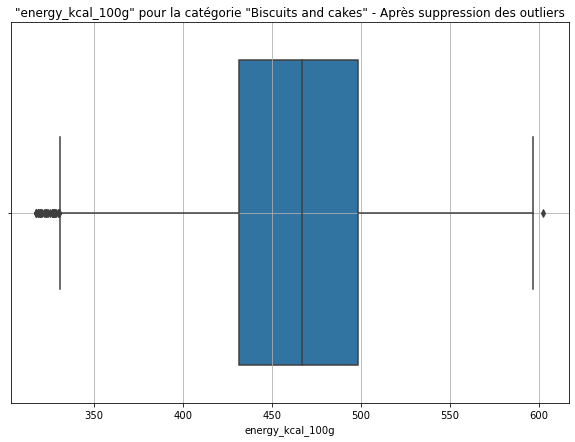

In [72]:
# Vérification du résultat obtenu avec la représentation de la boite à moustaches, puis de la distribution

df_temp2=IQR_exempl_data.loc[(IQR_exempl_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g'] 
plt.figure(figsize=(10,7))
plt.title('"energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Après suppression des outliers')
sns.boxplot(x=df_temp2 )
plt.grid()

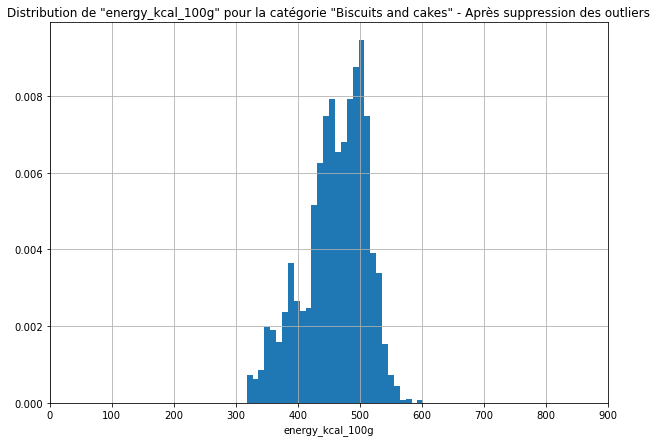

In [73]:
# Rerpésentation de la distribution après supression des outliers
plt.figure(figsize=(10,7))
plt.hist(df_temp2,30,density=True)
plt.title('Distribution de "energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Après suppression des outliers')
plt.xlabel('energy_kcal_100g')
plt.xlim(0,900)
plt.grid(True)
plt.show()

In [74]:
IQR_data.describe()

,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,energy_kcal_100g
count,40730.000000,41024.000000,41092.000000,40316.000000,41216.000000,41214.000000,26502.000000,42692.000000,40369.000000,42904.000000
mean,13.431102,5.352826,12.792346,27.114141,0.874133,0.346177,2.595349,7.648322,8.380886,259.081300
std,17.255768,8.326202,18.434028,27.338871,1.541573,0.730871,3.715772,7.355771,9.071065,187.323933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,1.200000,0.300000,1.000000,3.800000,0.060000,0.023622,0.300000,1.500000,1.000000,93.150000
50%,6.600000,1.900000,4.000000,13.500000,0.560000,0.220472,1.600000,6.000000,8.000000,236.940000
75%,21.700000,7.400000,15.600000,53.000000,1.200000,0.472441,3.400000,11.000000,15.000000,389.800000
max,100.000000,100.000000,100.000000,100.000000,76.200000,83.000000,86.200000,86.000000,40.000000,899.970000


**GENERALISATION MISE EN OEUVRE DE LA METHODE EN BOUCLANT SUR LES CATEGORIES de PNNS_GROUPS_2 ET SUR LES VARIABLES**

In [75]:
#  line_temp =  [cat, col, q1, q3, IQR, borne_inf, borne_sup]
# print(line_temp)

In [76]:
sans_outli_data = IQR_data.copy()

## GENERALISATION MISE EN OEUVRE DE LA METHODE EN BOUCLANT SUR LES CATEGORIES de PNNS_GROUPS_2 ET SUR LES VARIABLES##

for cat in sans_outli_data['pnns_groups_2'].unique().tolist() :
    for col in sans_outli_data.select_dtypes(include=['float64']).columns:

        # Calcul du 1er et 3ème quartile    
        q1=sans_outli_data.loc[sans_outli_data['pnns_groups_2']==cat,col].quantile(q=0.25)
        q3=sans_outli_data.loc[sans_outli_data['pnns_groups_2']==cat,col].quantile(q=0.75)
       
        # Calcul de l'écart interquartile (IQR) comme la différence Q3-Q1
        IQR=q3-q1

        # On calcule la borne inférieure  et supérieure à l'aide du Q1, Q3 et de l'écart interquartile
        borne_inf = q1-1.5*IQR
        borne_sup = q3 +1.5*IQR

        # Les valeurs inférieures à la borne inférieure, et supérieures à la borne supérieure sont considérées commes comme des valeurs aberrantes
        # Les valeurs sont remplacées par NaN
        sans_outli_data.loc[(sans_outli_data[col]<borne_inf)&(sans_outli_data['pnns_groups_2']==cat),col]=np.nan
        sans_outli_data.loc[(sans_outli_data[col]>borne_sup)&(sans_outli_data['pnns_groups_2']==cat),col]=np.nan  

na_rate_after = round(sans_outli_data.isna().mean().mean(),4)
na_rate_before = round(IQR_data.isna().mean().mean(),4)

na_number_after = sans_outli_data.isna().sum().sum()
na_number_before = IQR_data.isna().sum().sum()

print("% NaN avant traitement Vs. après traitement : " + str(na_rate_before) + "% | " + str(na_rate_after) + "%")
print("NB NaN avant traitement Vs. après traitement : " + str(na_number_before) + " | " + str(na_number_after))

% NaN avant traitement Vs. après traitement : 0.2164% | 0.2497%
NB NaN avant traitement Vs. après traitement : 166542 | 192173


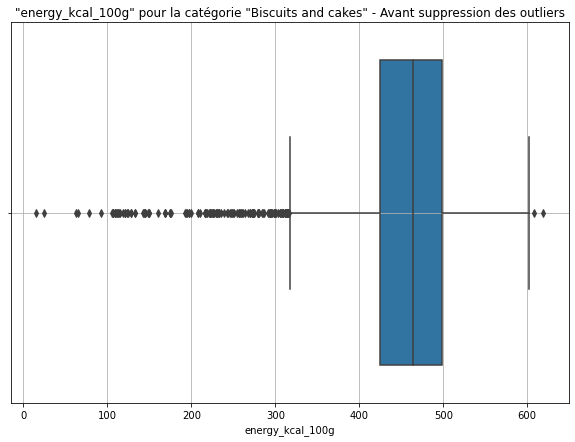

In [77]:
#Vérification du traitement sur des exemples, ici energy_kcal_100g sur categori Biscuits and cakes
#Boxplot avant traitement des outliers
df_temp3=IQR_data.loc[(IQR_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g'] 
plt.figure(figsize=(10,7))
plt.title('"energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Avant suppression des outliers')
sns.boxplot(x=df_temp3 )
plt.grid()

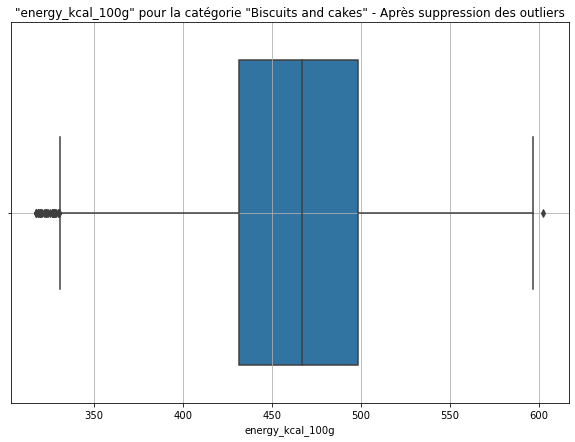

In [78]:
#Boxplot après traitement des outliers
df_temp4=sans_outli_data.loc[(sans_outli_data['pnns_groups_2']=='Biscuits and cakes'),'energy_kcal_100g'] 
plt.figure(figsize=(10,7))
plt.title('"energy_kcal_100g" pour la catégorie "Biscuits and cakes" - Après suppression des outliers')
sns.boxplot(x=df_temp4 )
plt.grid()

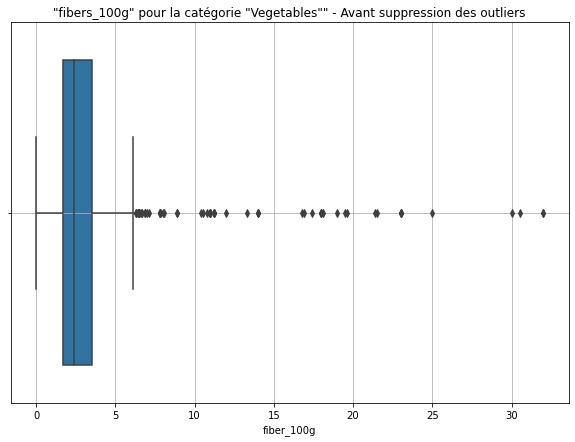

In [79]:
#Vérification du traitement sur des exemples, ici fiber et Vegetables
#Boxplot avant traitement des outliers
df_temp5=IQR_data.loc[(IQR_data['pnns_groups_2']=='Vegetables'),'fiber_100g'] 
plt.figure(figsize=(10,7))
plt.title('"fibers_100g" pour la catégorie "Vegetables"" - Avant suppression des outliers')
sns.boxplot(x=df_temp5 )
plt.grid()

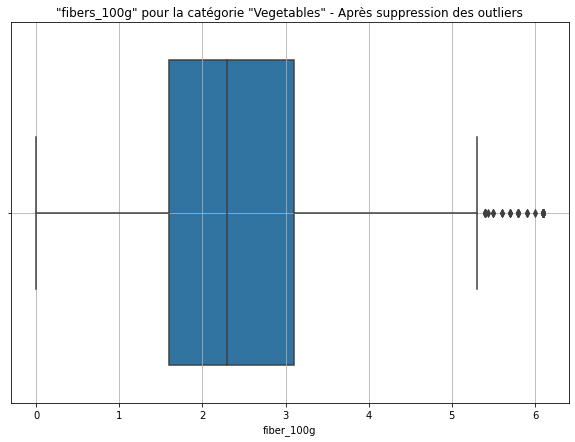

In [80]:
#Vérification du traitement sur des exemples, ici fiber et Vegetables
#Boxplot après traitement des outliers
df_temp6=sans_outli_data.loc[(sans_outli_data['pnns_groups_2']=='Vegetables'),'fiber_100g'] 
plt.figure(figsize=(10,7))
plt.title('"fibers_100g" pour la catégorie "Vegetables" - Après suppression des outliers')
sns.boxplot(x=df_temp6 )
plt.grid()

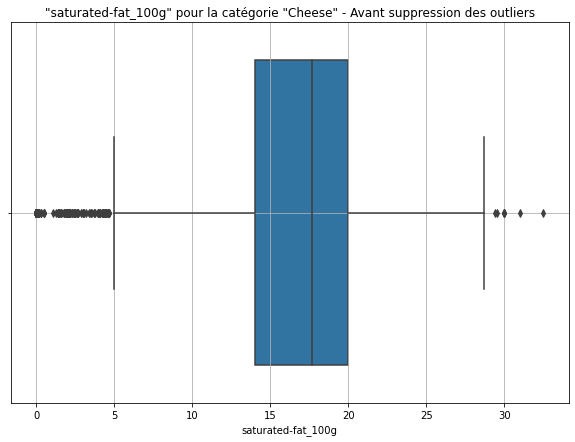

In [81]:
#Vérification du traitement sur des exemples, ici saturated-fat_100g  sur categories cheese
#Boxplot avant traitement des outliers
df_temp7=IQR_data.loc[(IQR_data['pnns_groups_2']=='Cheese'),'saturated-fat_100g'] 
plt.figure(figsize=(10,7))
plt.title('"saturated-fat_100g" pour la catégorie "Cheese" - Avant suppression des outliers')
sns.boxplot(x=df_temp7 )
plt.grid()

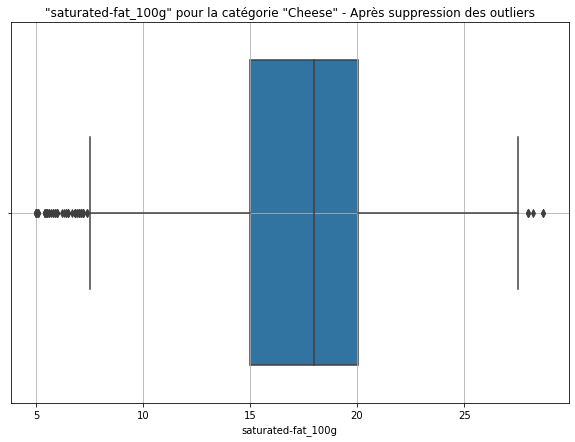

In [82]:
#Vérification du traitement sur des exemples, ici saturated-fat_100g  sur categories cheese
#Boxplot après traitement des outliers
df_temp8=sans_outli_data.loc[(sans_outli_data['pnns_groups_2']=='Cheese'),'saturated-fat_100g']
plt.figure(figsize=(10,7))
plt.title('"saturated-fat_100g" pour la catégorie "Cheese" - Après suppression des outliers')
sns.boxplot(x=df_temp8 )
plt.grid()

In [83]:
#Description statistique après traitemetn des outliers
sans_outli_data.describe()

,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,energy_kcal_100g
count,37939.000000,37757.000000,38091.000000,37774.000000,38440.000000,38434.000000,24663.000000,40823.000000,38635.000000,39872.000000
mean,12.969228,5.087827,11.787391,26.669853,0.742160,0.292231,2.161543,7.403258,8.284146,257.757068
std,16.999843,8.198245,16.813315,27.306150,0.867052,0.341371,2.434171,7.037863,9.062963,188.351985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,0.000000
25%,1.000000,0.200000,1.000000,3.400000,0.050000,0.019685,0.200000,1.400000,1.000000,91.480000
50%,6.100000,1.700000,3.700000,13.000000,0.530000,0.208661,1.500000,6.000000,8.000000,232.640000
75%,21.000000,6.600000,14.000000,53.000000,1.160000,0.456693,3.100000,10.600000,15.000000,391.710000
max,100.000000,100.000000,92.000000,100.000000,6.197600,2.440000,19.200000,34.000000,33.000000,899.970000


In [84]:
#nombre de valeurs manquantes sur tout le dataframe 
sans_outli_data.isna().sum().sum()

192173

**Suppresion des lignes trop peu remplies**

En conclusion de cette étape de gestion des valeurs aberrantes,  on élimine les lignes de produits trop peu remplies, on considère qu'elles ne seront pas exploitables pour faire l'imputation prévue par la suite.

In [85]:
# nombre de ligne de notre jeu de données :
sans_outli_data.shape[0]

54967

In [86]:
# Définition du taux (entre 0 et 1) de remplissage souhaité pour les lignes de produits
# par exemple taux à 0.5 --> 50 % de la ligne est remplie
tx_rempl_lignes = 0.5
na_dropped_data = sans_outli_data.dropna(axis=0,thresh=IQR_data.shape[1]*tx_rempl_lignes)

#Nombre de lignes après suppression des produits ayant peu peu d'informations
na_dropped_data.shape[0]

42269

# 5. Gestion des valeurs manquantes
- imputation par la moyenne
- imputation par 0
- iterative imputer
- KNN imputer

In [87]:
#data frame pour travailler sur les valeurs manquantes
data_VM=na_dropped_data.copy()
# Nombre de valeurs manquantes avant gestion
data_VM.isna().sum().sum()

54471

In [88]:
data_VM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42269 entries, 226 to 320763
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     42269 non-null  object 
 1   product_name             42171 non-null  object 
 2   pnns_groups_2            42269 non-null  object 
 3   fat_100g                 37331 non-null  float64
 4   saturated-fat_100g       37697 non-null  float64
 5   sugars_100g              37975 non-null  float64
 6   carbohydrates_100g       37527 non-null  float64
 7   salt_100g                38332 non-null  float64
 8   sodium_100g              38328 non-null  float64
 9   fiber_100g               24608 non-null  float64
 10  proteins_100g            40526 non-null  float64
 11  nutrition-score-fr_100g  38541 non-null  float64
 12  nutrition_grade_fr       40152 non-null  object 
 13  energy_kcal_100g         39569 non-null  float64
dtypes: float64(10), obj

Est-ce qu'il y a des lignes de produits pour lesquels on a le Nutri-Score numérique (nutrition-score-fr_100g) mais pas le nutriscore en lettre (nutrition_grade_fr) ?  Il serait facile de compléter la lettre à partir du score.

In [89]:
data_VM.loc[data_VM['nutrition_grade_fr' ].isna()&~data_VM['nutrition-score-fr_100g' ].isna()]

,code,product_name,pnns_groups_2,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nutrition_grade_fr,energy_kcal_100g


In [90]:
# Non

## 5.1 Imputation par la moyenne
On effectuer une imputation par la moyenne par catégorie de produits homogènes, pour les variables protéines, sucre, carbohydrates, sel et sodium

In [91]:
data_imput_moyenne = data_VM.copy()

#Liste des catégories pour l'itération
list_cat = data_imput_moyenne['pnns_groups_2'].unique().tolist()

#Liste des variables pour l'application de l'imputation par la moyenne
list_variable = ['proteins_100g', 'sugars_100g', 'carbohydrates_100g', 'salt_100g', 'sodium_100g' ]

# Boucle d'imputation par la moyenne pour Protéines, Sucre, Carbs, Sel, Sodium
for cat in list_cat :
    for variable in list_variable :
        current_mean = data_imput_moyenne.loc[(data_imput_moyenne['pnns_groups_2']==cat), variable].mean()
        data_imput_moyenne.loc[(data_imput_moyenne['pnns_groups_2']==cat) & data_imput_moyenne[variable].isna(), variable] = current_mean
        
        nanmber_after = data_imput_moyenne.loc[data_imput_moyenne['pnns_groups_2']==cat, variable].isna().sum()
        nanmber_before = data_VM.loc[data_VM['pnns_groups_2']==cat, variable].isna().sum()
        mean_after = data_imput_moyenne.loc[(data_imput_moyenne['pnns_groups_2']==cat), variable].mean()
        mean_before = data_VM.loc[(data_VM['pnns_groups_2']==cat), variable].mean()
        print(cat + " for " + variable +" | NaN : " + str(nanmber_after) + " / " +  str(nanmber_before) + " Mean : " + str(mean_after) + " / " + str(mean_before))
        

Sweetened beverages for proteins_100g | NaN : 0 / 161 Mean : 0.09934962251201082 / 0.09934962251201059
Sweetened beverages for sugars_100g | NaN : 0 / 235 Mean : 7.414490238611727 / 7.414490238611727
Sweetened beverages for carbohydrates_100g | NaN : 0 / 286 Mean : 7.590490990991055 / 7.59049099099101
Sweetened beverages for salt_100g | NaN : 0 / 210 Mean : 0.01840065450284102 / 0.018400654502840976
Sweetened beverages for sodium_100g | NaN : 0 / 214 Mean : 0.007141419997980926 / 0.007141419997980975
Biscuits and cakes for proteins_100g | NaN : 0 / 137 Mean : 6.109690043832173 / 6.109690043832185
Biscuits and cakes for sugars_100g | NaN : 0 / 200 Mean : 31.281287128712925 / 31.281287128712883
Biscuits and cakes for carbohydrates_100g | NaN : 0 / 243 Mean : 61.424799222798 / 61.42479922279796
Biscuits and cakes for salt_100g | NaN : 0 / 122 Mean : 0.5978398162044251 / 0.5978398162044248
Biscuits and cakes for sodium_100g | NaN : 0 / 122 Mean : 0.23536778389274216 / 0.23536778389274132
O

Bread for proteins_100g | NaN : 0 / 45 Mean : 9.597754545454537 / 9.59775454545453
Bread for sugars_100g | NaN : 0 / 62 Mean : 4.796832871652816 / 4.796832871652823
Bread for carbohydrates_100g | NaN : 0 / 63 Mean : 57.48534195933455 / 57.48534195933453
Bread for salt_100g | NaN : 0 / 162 Mean : 1.220669109969483 / 1.2206691099694817
Bread for sodium_100g | NaN : 0 / 162 Mean : 0.480578902403859 / 0.48057890240385825
Chocolate products for proteins_100g | NaN : 0 / 54 Mean : 6.7426865671641805 / 6.74268656716418
Chocolate products for sugars_100g | NaN : 0 / 99 Mean : 44.3937465986394 / 44.39374659863945
Chocolate products for carbohydrates_100g | NaN : 0 / 165 Mean : 48.31374263839805 / 48.313742638398104
Chocolate products for salt_100g | NaN : 0 / 98 Mean : 0.14825051537563724 / 0.14825051537563708
Chocolate products for sodium_100g | NaN : 0 / 98 Mean : 0.05836627142780657 / 0.058366271427806656
Processed meat for proteins_100g | NaN : 0 / 68 Mean : 19.23142156862746 / 19.231421568

In [92]:
# Taux de valeur manquantes apres l'imputation par la moyenne
round(data_imput_moyenne.isna().mean().mean(),4)

0.0605

In [93]:
# Nombre de valeur manquantes apres l'imputation par la moyenne
data_imput_moyenne.isna().sum().sum()

35814

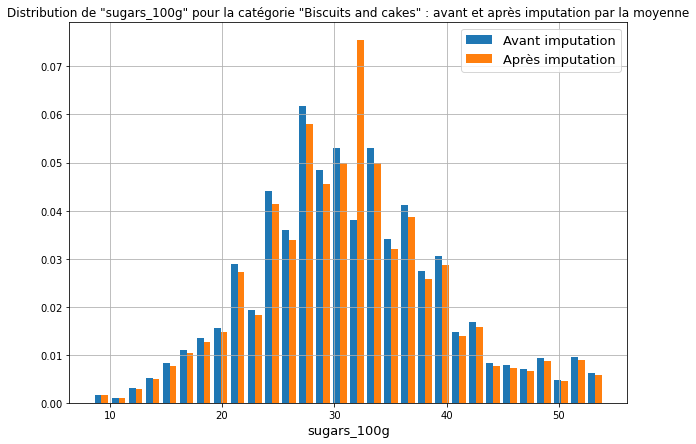

In [94]:
# Exemple de distribution avant / après l'imputation par la moyenne pour la variable "sugars_100g" pour la catégorie "Biscuits and cakes"
plt.figure(figsize=(10,7))
plt.hist([data_VM.loc[data_imput_moyenne['pnns_groups_2']=='Biscuits and cakes', "sugars_100g"],data_imput_moyenne.loc[data_imput_moyenne['pnns_groups_2']=='Biscuits and cakes', "sugars_100g"]] ,30,density=True)
plt.title('Distribution de "sugars_100g" pour la catégorie "Biscuits and cakes" : avant et après imputation par la moyenne')
plt.xlabel('sugars_100g', fontsize=13)
plt.legend(['Avant imputation', 'Après imputation'],fontsize=13)
plt.grid(True)
plt.show()

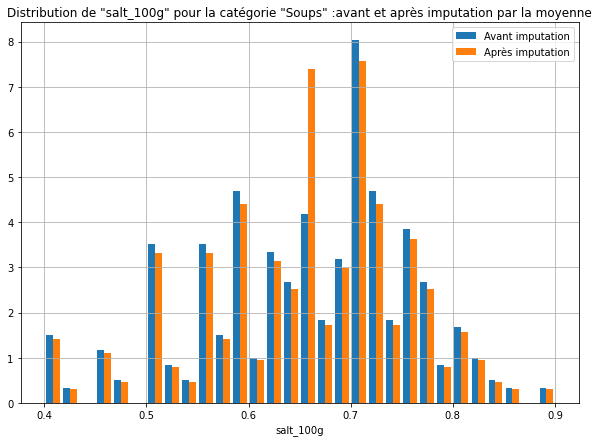

In [95]:
# Example de distribution avant / apres l'imputation par la moyenne "salt_100g" pour la catégorie "Soups"
plt.figure(figsize=(10,7))
plt.hist([data_VM.loc[data_imput_moyenne['pnns_groups_2']=="Soups", "salt_100g"],data_imput_moyenne.loc[data_imput_moyenne['pnns_groups_2']=="Soups", "salt_100g"]] ,30,density=True)
plt.title('Distribution de "salt_100g" pour la catégorie "Soups" :avant et après imputation par la moyenne')
plt.xlabel('salt_100g')
plt.legend(['Avant imputation', 'Après imputation'])
plt.grid(True)
plt.show()

## 5.2 Imputation par  0
Test d'imputation par 0 pour les fibres ( les valeurs sont assez faibles)

In [96]:
data_imput_null = data_imput_moyenne.copy()

In [97]:
#On remplace par 0 les valeurs manquantes de la variables fibres fiber_100g
data_imput_null['fiber_100g'].fillna(0,inplace=True)

In [98]:
# Nb de valeurs manquantes avant imputation / après imputation (sur les fiber 100g)
nan_before = data_imput_moyenne['fiber_100g'].isna().sum()
nan_after = data_imput_null['fiber_100g'].isna().sum()
print("Nb de valeurs manquantes (avant et apres imputation) : " + str(nan_before) +  " / " + str(nan_after))

Nb de valeurs manquantes (avant et apres imputation) : 17661 / 0


In [99]:
# Moyenne avant imputation par zero / après imputation
average_before = data_imput_moyenne['fiber_100g'].mean()
average_after = data_imput_null['fiber_100g'].mean()
print("Moyenne (avant et apres imputation) : " + str(average_before) +  " / " + str(average_after))

Moyenne (avant et apres imputation) : 2.1632762353706023 / 1.2594076415339797


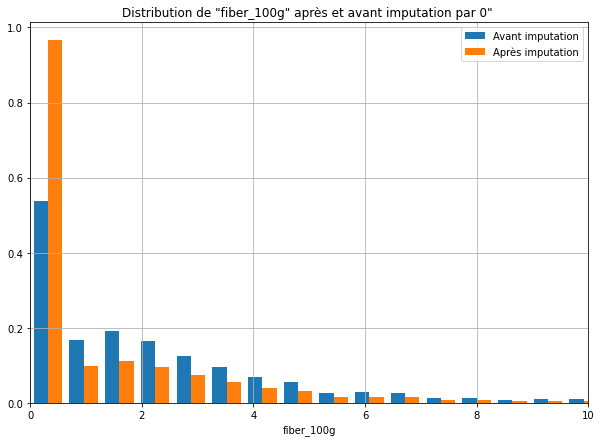

In [100]:
plt.figure(figsize=(10,7))
plt.hist([data_imput_moyenne['fiber_100g'],data_imput_null['fiber_100g']],30,density=True)
plt.title('Distribution de "fiber_100g" après et avant imputation par 0" ')
plt.xlabel('fiber_100g')
plt.xlim(0,10)
plt.grid(True)
plt.legend(['Avant imputation', 'Après imputation'])
plt.show()

In [101]:
# Taux de valeur manquantes apres l'imputation par 0
round(data_imput_null.isna().mean().mean(),4)

0.0307

In [102]:
# Nombre de valeur manquantes apres l'imputation par la moyenne
data_imput_null.isna().sum().sum()

18153

## 5.3 Imputation avec Iterative imputer
(Pour les fat, fat saturated & energy)

S'applique sur des variables corrélées. On recherche les recherche à l'aide de la heatmap.

In [103]:
data_iter_imputer = data_imput_null.copy()

In [104]:
#colonnes numériques du dataframe
numerical_columns_df =data_iter_imputer.select_dtypes(exclude=['object'])

**Matrice des corrélations**

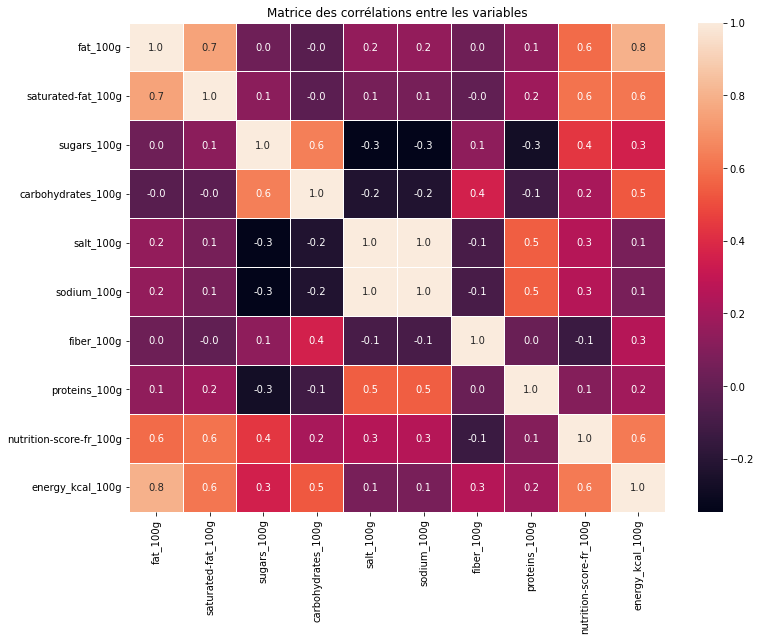

In [105]:
# Matrice des corrélations pour exploration les liens entre les variables
plt.figure(figsize=(12,9))
sns.heatmap(data=numerical_columns_df.corr(),annot=True,linewidth=0.5,fmt=".1f")
plt.title('Matrice des corrélations entre les variables')
plt.show()

Les variables 'energy_kcal_100g_imputed', 'fat_100g_imputed', 'saturated-fat_100g_imputed' semblent corrélées 

In [106]:
# Filtrage du dataframe sur les colonnes corrélées
df_gras=data_iter_imputer[['energy_kcal_100g','fat_100g','saturated-fat_100g']]
df_gras

,energy_kcal_100g,fat_100g,saturated-fat_100g
226,42.28,0.0,0.00
240,42.28,0.0,0.00
242,453.81,23.0,2.50
279,422.28,19.0,2.50
283,398.87,15.0,2.00
...,...,...,...
320681,242.91,1.3,1.28
320702,246.25,1.3,1.28
320734,514.71,NaN,3.40
320751,392.42,2.8,0.60


In [107]:
# Mise en oeuvre de IterativeImputer pour'energy_kcal_100g_imputed', 'fat_100g_imputed', 'saturated-fat_100g_imputed'
iterativeImputer_Energy_Fat=IterativeImputer(random_state=0,skip_complete=True)
imputedGras=iterativeImputer_Energy_Fat.fit_transform(df_gras)
df_gras_imputed=pd.DataFrame(imputedGras,columns=df_gras.columns)
df_gras_imputed.columns = ['energy_kcal_100g_imputed', 'fat_100g_imputed', 'saturated-fat_100g_imputed']
df_gras_imputed

,energy_kcal_100g_imputed,fat_100g_imputed,saturated-fat_100g_imputed
0,42.28,0.000000,0.00
1,42.28,0.000000,0.00
2,453.81,23.000000,2.50
3,422.28,19.000000,2.50
4,398.87,15.000000,2.00
...,...,...,...
42264,242.91,1.300000,1.28
42265,246.25,1.300000,1.28
42266,514.71,24.054665,3.40
42267,392.42,2.800000,0.60


In [108]:
# On concatène le dataframe des valeurs imputées avec le dataframe original
output_imputer = pd.concat([data_iter_imputer.reset_index(drop=True), df_gras_imputed], axis=1)
output_imputer.drop(['fat_100g', 'saturated-fat_100g', 'energy_kcal_100g'], axis=1, inplace=True)
output_imputer.rename(columns = {'energy_kcal_100g_imputed':'energy_kcal_100g', 'fat_100g_imputed':'fat_100g', 'saturated-fat_100g_imputed':'saturated-fat_100g'}, inplace = True)
output_imputer

,code,product_name,pnns_groups_2,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,nutrition_grade_fr,energy_kcal_100g,fat_100g,saturated-fat_100g
0,0000040608754,"Pepsi, Nouveau goût !",Sweetened beverages,10.400000,10.400000,0.0254,0.010000,0.000,0.000,13.0,E,42.28,0.000000,0.00
1,0000087177756,7Up,Sweetened beverages,10.400000,10.400000,0.1000,0.039370,0.000,0.000,13.0,E,42.28,0.000000,0.00
2,000010,Madeleines nature,Biscuits and cakes,26.000000,55.000000,0.6600,0.259843,1.500,6.000,12.0,D,453.81,23.000000,2.50
3,000030,Cakes Raisins,Biscuits and cakes,28.000000,56.000000,0.6500,0.255906,1.800,5.800,13.0,D,422.28,19.000000,2.50
4,000031,Cakes aux Fruits,Biscuits and cakes,34.000000,60.000000,0.6000,0.236220,1.500,4.900,12.0,D,398.87,15.000000,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42264,96068779,Spearmint sans sucres,Sweets,54.677758,95.870000,0.0050,0.001969,0.005,0.040,4.0,C,242.91,1.300000,1.28
42265,96118580,Fisherman's Friend Miel-Citron,Sweets,54.677758,95.310000,0.0010,0.000394,1.470,0.004,2.0,B,246.25,1.300000,1.28
42266,9778564312457,Nature cheddar and red onion crisps,Appetizers,1.800000,55.251287,1.3500,0.531496,5.600,7.800,9.0,C,514.71,24.054665,3.40
42267,9847548283004,Tartines craquantes bio au sarrasin,Bread,2.600000,74.800000,0.6800,0.267717,5.900,13.000,-4.0,A,392.42,2.800000,0.60


In [109]:
# Nombre de valeurs manquantes avant imputation par iterative imputer
data_imput_null.isna().sum().sum()

18153

In [110]:
# Nombre de valeurs manquantes après imputation par iterrative imputer
output_imputer.isna().sum().sum()

5943

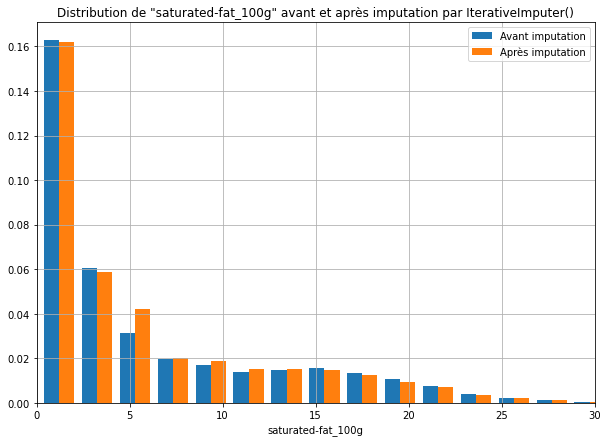

In [111]:
# Distribution avant et après utilisation du Iterative Imputer pour saturated-fat_100g
plt.figure(figsize=(10,7))
plt.hist([data_imput_null['saturated-fat_100g'],output_imputer['saturated-fat_100g']] ,50,density=True)
plt.title('Distribution de "saturated-fat_100g" avant et après imputation par IterativeImputer()')
plt.xlabel('saturated-fat_100g')
plt.xlim(0,30)
plt.grid(True)
plt.legend(['Avant imputation', 'Après imputation'])
plt.show()

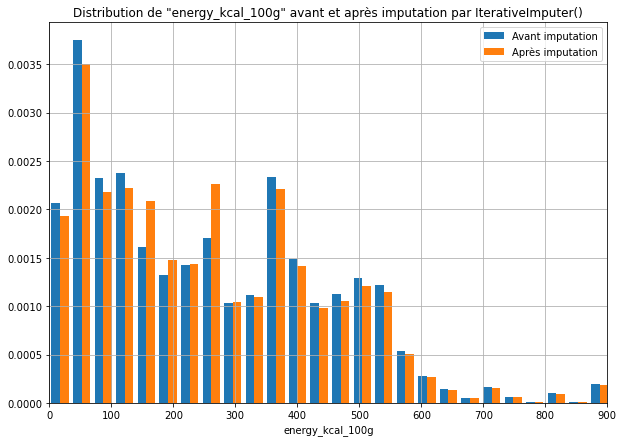

In [112]:
# Distribution avant et après utilisation du Iterative Imputer pour energy_kcal_100g
plt.figure(figsize=(10,7))
plt.hist([data_imput_null['energy_kcal_100g'],output_imputer['energy_kcal_100g']] ,30,density=True)
plt.title('Distribution de "energy_kcal_100g" avant et après imputation par IterativeImputer()')
plt.xlabel('energy_kcal_100g')
plt.xlim(0,900)
plt.grid(True)
plt.legend(['Avant imputation', 'Après imputation'])
plt.show()

## 5.4 Imputation du Nutriscore avec le KNN Imputer

Le nutri-score s'obtient à partir des valeurs nutritionnelles. On peut supposer que des produits ayant des valeurs nutritionnelles proches auront un nutri-score identique.

In [113]:
data_knn_imputer = output_imputer.copy()

#Selection des données
df_knn = data_knn_imputer[['sugars_100g','salt_100g','fiber_100g', 'proteins_100g','saturated-fat_100g', 'nutrition-score-fr_100g', 'energy_kcal_100g' ]]
# KNN avec k=5
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(df_knn)

df_knn_imputed = pd.DataFrame(knn_imputed,columns=df_knn.columns)
# on supprime les "anciennes" colonnes
df_knn_imputed.drop(['sugars_100g','salt_100g','fiber_100g', 'proteins_100g','saturated-fat_100g','energy_kcal_100g'], axis=1, inplace=True)
df_knn_imputed.rename(columns = {'nutrition-score-fr_100g' : 'nutrition-score-fr_100g_imputed'}, inplace = True)
df_knn_imputed
output_knn_imputer = pd.concat([data_knn_imputer.reset_index(drop=True), df_knn_imputed], axis=1)
output_knn_imputer.drop(['nutrition-score-fr_100g'], axis=1, inplace=True)
output_knn_imputer.rename(columns = {'nutrition-score-fr_100g_imputed' : 'nutrition-score-fr_100g'}, inplace = True)
output_knn_imputer

,code,product_name,pnns_groups_2,sugars_100g,carbohydrates_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutrition_grade_fr,energy_kcal_100g,fat_100g,saturated-fat_100g,nutrition-score-fr_100g
0,0000040608754,"Pepsi, Nouveau goût !",Sweetened beverages,10.400000,10.400000,0.0254,0.010000,0.000,0.000,E,42.28,0.000000,0.00,13.0
1,0000087177756,7Up,Sweetened beverages,10.400000,10.400000,0.1000,0.039370,0.000,0.000,E,42.28,0.000000,0.00,13.0
2,000010,Madeleines nature,Biscuits and cakes,26.000000,55.000000,0.6600,0.259843,1.500,6.000,D,453.81,23.000000,2.50,12.0
3,000030,Cakes Raisins,Biscuits and cakes,28.000000,56.000000,0.6500,0.255906,1.800,5.800,D,422.28,19.000000,2.50,13.0
4,000031,Cakes aux Fruits,Biscuits and cakes,34.000000,60.000000,0.6000,0.236220,1.500,4.900,D,398.87,15.000000,2.00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42264,96068779,Spearmint sans sucres,Sweets,54.677758,95.870000,0.0050,0.001969,0.005,0.040,C,242.91,1.300000,1.28,4.0
42265,96118580,Fisherman's Friend Miel-Citron,Sweets,54.677758,95.310000,0.0010,0.000394,1.470,0.004,B,246.25,1.300000,1.28,2.0
42266,9778564312457,Nature cheddar and red onion crisps,Appetizers,1.800000,55.251287,1.3500,0.531496,5.600,7.800,C,514.71,24.054665,3.40,9.0
42267,9847548283004,Tartines craquantes bio au sarrasin,Bread,2.600000,74.800000,0.6800,0.267717,5.900,13.000,A,392.42,2.800000,0.60,-4.0


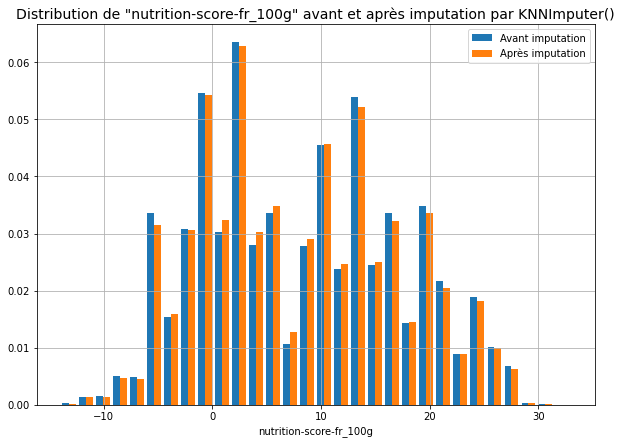

In [114]:
# Distribution avant et après utilisation du KNNImputer pour le nutriscore
plt.figure(figsize=(10,7))
plt.hist([data_imput_null['nutrition-score-fr_100g'],output_knn_imputer['nutrition-score-fr_100g']] ,30,density=True)
plt.title('Distribution de "nutrition-score-fr_100g" avant et après imputation par KNNImputer()',fontsize=14)
plt.xlabel('nutrition-score-fr_100g')
plt.grid(True)
plt.legend(['Avant imputation', 'Après imputation'])
plt.show()

In [115]:
# Nombre de valeurs manquantes avant imputation par iterative imputer
output_knn_imputer.isna().sum().sum()

2215

In [116]:
# Nombre de valeurs manquantes après imputation par iterrative imputer
output_knn_imputer.isna().sum().sum()

2215

## 5.5 Imputation du Nutri-score en lettres à partir du nutriscore numérique 

In [117]:
# valeur manquantes au niveau du Nutriscore en lettres
output_knn_imputer['nutrition_grade_fr'].isna().sum()

2117

In [118]:
# A un intervalle de score, correspond une lettre

# Nutri-Score A : Nutri-score <= -1
maskA=(output_knn_imputer['nutrition-score-fr_100g']<0) & (output_knn_imputer['nutrition_grade_fr'].isna())
output_knn_imputer.loc[maskA,'nutrition_grade_fr']='A'

# Nutri-Score B : Nutri-score compris entre 0 et 2
maskB=(output_knn_imputer['nutrition-score-fr_100g']>=0) & (output_knn_imputer['nutrition-score-fr_100g']<3)&(output_knn_imputer['nutrition_grade_fr'].isna())
output_knn_imputer.loc[maskB,'nutrition_grade_fr']='B'

# Nutri-Score C : Nutri-score compris entre 3 et 10
maskC=(output_knn_imputer['nutrition-score-fr_100g']>=3) & (output_knn_imputer['nutrition-score-fr_100g']<11)&(output_knn_imputer['nutrition_grade_fr'].isna())
output_knn_imputer.loc[maskC,'nutrition_grade_fr']='C'

# Nutri-Score D : Nutri-score compris entre 11 et 18
maskD=(output_knn_imputer['nutrition-score-fr_100g']>=11) & (output_knn_imputer['nutrition-score-fr_100g']<19)&(output_knn_imputer['nutrition_grade_fr'].isna())
output_knn_imputer.loc[maskD,'nutrition_grade_fr']='D'

# Nutri-Score E : Nutri-score supérieur ou égal à 19
maskE=(output_knn_imputer['nutrition-score-fr_100g']>=19) & (output_knn_imputer['nutrition_grade_fr'].isna())
output_knn_imputer.loc[maskE,'nutrition_grade_fr']='E'

In [119]:
output_knn_imputer['nutrition_grade_fr'].isna().sum()

0

In [120]:
output_knn_imputer['nutrition_grade_fr'].unique()

array(['E', 'D', 'A', 'B', 'C'], dtype=object)

## 5.6 Résultat des imputations

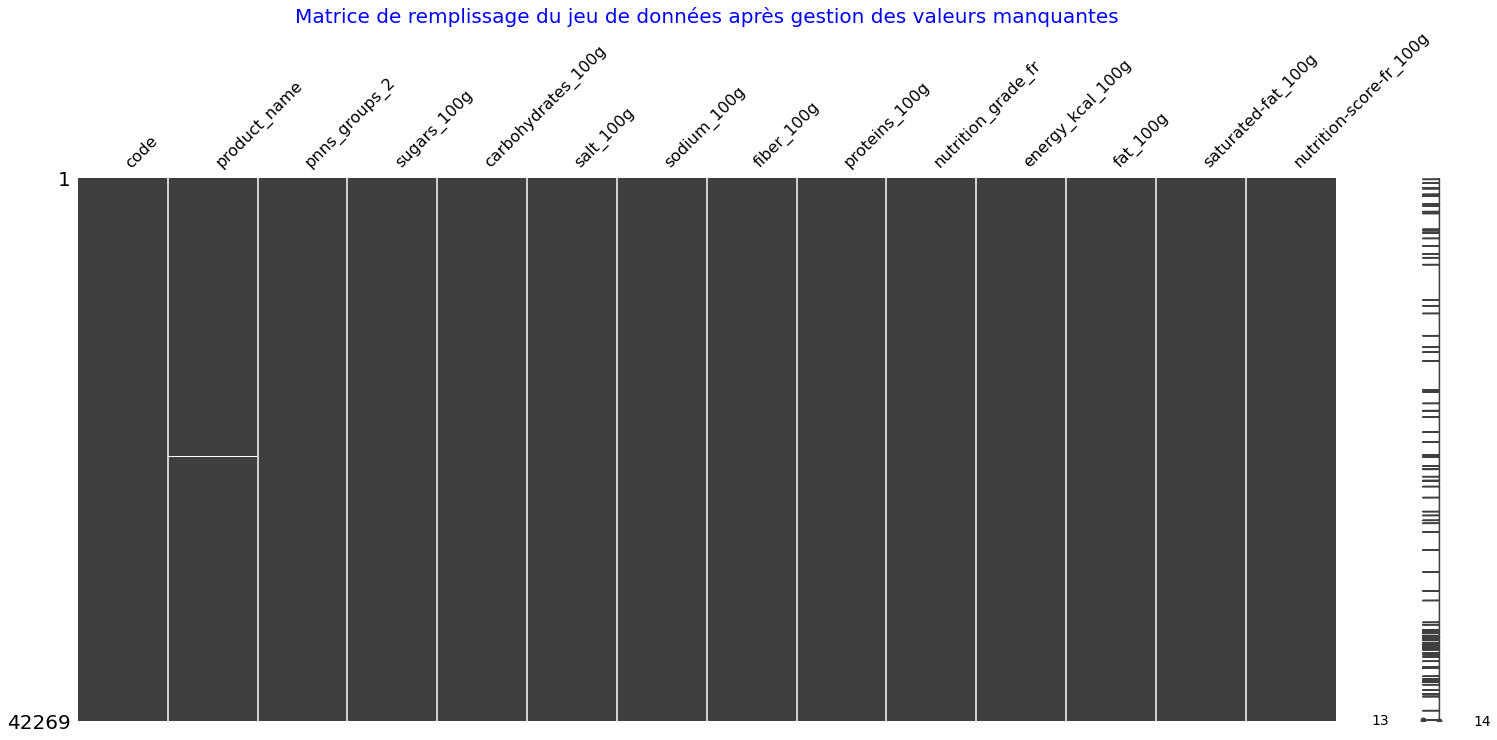

In [121]:
# Matrice de remplissage du jeu de données :
msno.matrix(output_knn_imputer)
plt.title(label='Matrice de remplissage du jeu de données après gestion des valeurs manquantes',fontsize=20, color='blue')
plt.show()

In [122]:
output_knn_imputer.isna().mean().mean()

0.000165605999668788

In [123]:
output_knn_imputer['product_name'].isna().sum()

98

Les seules valeurs manquantes restantes sont sur le nom des produits, ce n'est pas bloquante, on se sert du code-barres pour identifier les produits.

**Comparaison du jeu de données initial avec le jeu de données final**


In [124]:
comp_data = pd.DataFrame({'Fichier' : ['Jeu de données initial', 'Jeu de données nettoyé'],
                            'Dimensions (lignes, colonnes)' : [foodData.shape, output_knn_imputer.shape],
                           
                            'Proportion de valeurs manquantes (en %)' :
                            [round(foodData.isna().mean().mean()*100,3),
                             round(output_knn_imputer.isna().mean().mean()*100,3)]  })
comp_data

,Fichier,"Dimensions (lignes, colonnes)",Proportion de valeurs manquantes (en %)
0,Jeu de données initial,"(320772, 162)",76.222
1,Jeu de données nettoyé,"(42269, 14)",0.017


# Exportation du jeu de donné nettoyé en fichier.csv**

In [125]:
output_knn_imputer.to_csv('fr.openfoodfacts.org.products_clean.csv', index=False)

In [126]:
#Suite du projet avec la partie exploration dans un notebook séparé